In [83]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import csv
import sklearn
import time
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.stats import pointbiserialr
from scipy.stats import spearmanr
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Assigning a location to save all the plots
plot_loc = "C:/Users/Vipul/Universita' degli Studi dell'Aquila/Grocery - General/Vipul_Thesis_Work/Work/Plots/"

### READING THE SECTORS DATA

In [3]:
settore = pd.read_csv('univ_settore.txt', delimiter=',', header=0)

# settore

### READING PERSONAL DATA OF THE CARD HOLDERS

In [4]:
anagrafica_data = pd.read_csv('univ_carta_anagrafica.txt', delimiter=',', header=0)

# anagrafica_data

#### DIVIDING THE PERSONAL DATA INTO SUB-CATEGORIES TO ANALYZE TRENDS ####

##### BIRTH YEAR & AGE DATA

In [5]:
# Getting Birth Year Value counts
birthyear_data = anagrafica_data['anno_nascita'].value_counts()
# # Dropping the NULL data
birthyear_data.drop(index=' NULL', axis=0, inplace=True)

##### CAP DATA

In [6]:
# Getting CAP Value counts
cap_data = anagrafica_data['cap'].value_counts()
# Dropping the NULL data
cap_data.drop(index=' NULL', axis=0, inplace=True)

##### SEX DATA

In [7]:
# Getting Gender Value counts
sex_data = anagrafica_data['sesso'].value_counts()
# Dropping the NULL data
sex_data.drop(index=' NULL', axis=0, inplace=True)

### READING CATEGORY DATA OF THE AVAILABLE ITEMS

In [8]:
categorie_merceologiche = pd.read_csv('univ_categorie_merceologiche.txt', delimiter=',',
                                      header=0)

# Getting how many items from categorie_merceologiche are classified under different sectors
items_in_sec = pd.DataFrame(categorie_merceologiche.id_settore.value_counts())
items_in_sec.reset_index(inplace=True)
items_in_sec.columns = ['id_settore','num_items']
pd.merge(items_in_sec, settore, on=['id_settore'], how='outer').head()

,id_settore,num_items,nome
0,1,37.0,Bevande
1,2,25.0,Banco Self
2,3,32.0,Non Alimentare
3,4,56.0,Scatolame Alimentare
4,5,39.0,Dolciario - 1^ Colazione


### READING RECEIPTS DATA FOR THE MONTH OF MARCH 2023

In [9]:
scontrini_ojetti_marzo_2023 = pd.read_csv('univ_scontrini_ojetti_marzo_2023.txt', delimiter=',', header=0)
# Changing the 'data' column to date-time format
scontrini_ojetti_marzo_2023['data'] = pd.to_datetime(scontrini_ojetti_marzo_2023['data'])

#### CREATING A NEW 'RECEIPT DATA' DATA FRAME WITH AGGREGATED 'ITEMS BOUGHT' & 'MONEY SPENT' VALUES

In [10]:
scontrini_marzo_2023 = pd.read_csv('univ_scontrini_ojetti_marzo_2023.txt', delimiter=',',
                                         header=0)
# Changing the 'data' column to date-time format
scontrini_marzo_2023['data'] = pd.to_datetime(scontrini_marzo_2023['data'])
# Dropping the Categorie Mercologiche ID column for this part of the analysis
scontrini_marzo_2023.drop(columns='id_cat_merc', inplace=True)
# Grouping the data while adding up items in offer, items bought, and money spent
scontrini_marzo_2023 = pd.DataFrame(scontrini_marzo_2023.groupby(['data','cassa','numero']).agg({'in_offerta':'sum','qnt_num_pz':'sum','importo':'sum','id_carta':'mean'}))
# Changing data in the 'id_carta' column to type integer
scontrini_marzo_2023['id_carta'] = scontrini_marzo_2023['id_carta'].astype('int')
# Resetting index of the data frame
scontrini_marzo_2023.reset_index(inplace=True)
# Creating a new column that captures percentage of items bought on offer
scontrini_marzo_2023['%_offer'] = scontrini_marzo_2023.apply(lambda x: 100*x['in_offerta']/x['qnt_num_pz'], axis=1)
# Creating a new column that captures amount spent per item
scontrini_marzo_2023['imp/qnt'] = scontrini_marzo_2023.apply(lambda x: x['importo']/x['qnt_num_pz'], axis=1)
# Extracting the date
scontrini_marzo_2023['date'] = scontrini_marzo_2023['data'].dt.date
# Extracting the time
scontrini_marzo_2023['time'] = scontrini_marzo_2023['data'].dt.time
# Extracting the day
scontrini_marzo_2023['day'] = scontrini_marzo_2023['data'].dt.day_name()

In [16]:
# Saving to csv file for Power BI Visualization
scontrini_marzo_2023.to_csv('Location_01_receipt_data_March_2023.csv', index=False)

### SORTING DATA INTO GROUPS BASED ON CARDHOLDER OR NON-CARDHOLDER

In [17]:
data_nc = scontrini_marzo_2023.loc[scontrini_marzo_2023['id_carta'] == 0] # Non-cardholders
data_c = scontrini_marzo_2023.loc[scontrini_marzo_2023['id_carta'] != 0] # Cardholders

In [18]:
# Cardholders' Shopping Trends
print('Cardholders\' Trends per shopping trip:')
print('Average items bought in offer:', data_c['in_offerta'].mean())
print('Average total items bought:', data_c['qnt_num_pz'].mean())
print('Average total money spent: ', data_c['importo'].mean())
print('Average percentage of items bought in offer:', data_c['%_offer'].mean())
print('Average money spent per item: ', data_c['imp/qnt'].mean())

Cardholders' Trends per shopping trip:
Average items bought in offer: 4.255693760121283
Average total items bought: 19.492540398993903
Average total money spent:  45.01402656513799
Average percentage of items bought in offer: 22.99285700799181
Average money spent per item:  2.5984233855895265


In [19]:
# Non-Cardholders' Shopping Trends
print('Non-Cardholders\' Trends per shopping trip:')
print('Average items bought in offer:', data_nc['in_offerta'].mean())
print('Average total items bought:', data_nc['qnt_num_pz'].mean())
print('Average total money spent: ', data_nc['importo'].mean())
print('Average percentage of items bought in offer:', data_nc['%_offer'].mean())
print('Average money spent per item: ', data_nc['imp/qnt'].mean())

Non-Cardholders' Trends per shopping trip:
Average items bought in offer: 2.1237218202475634
Average total items bought: 11.364408299946183
Average total money spent:  26.16957758775339
Average percentage of items bought in offer: 18.829676502692823
Average money spent per item:  2.624216923243009


### PLOTTING MONEY SPENT DATA SPLITTING INTO
### CARDHOLDERS AND NON-CARDHOLDERS CATEGORIES

In [20]:
#### PLOTTING CARDHOLDERS DATA AFTER NON-CARDHOLDERS DATA ####

figure(num=1, figsize=(24,18), dpi=100, facecolor='w', edgecolor='r')

sns.scatterplot(data=data_nc, x=data_nc.index, y='importo', marker='o', color='red') # Non-cardholders
sns.scatterplot(data=data_c, x=data_c.index, y='importo', marker='o', color='green') # Cardholders

plt.xlabel('Number of transactions in March 2023', size=20)
plt.ylabel('Money spent per transaction (in Euros)', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Location 01: Money spent by customers per shopping trip in March 2023', size=30)
plt.legend(['Non-Cardholders','Cardholders'], fontsize=20)

plt.savefig(plot_loc+"1st_plot_moneyspent_card_loc1.png")
plt.close()
# plt.show()

In [22]:
#### PLOTTING NON-CARDHOLDERS DATA AFTER CARDHOLDERS DATA ####

figure(num=2, figsize=(24,18), dpi=100, facecolor='w', edgecolor='r')

sns.scatterplot(data=data_c, x=data_c.index, y='importo', marker='o', color='green') # Cardholders
sns.scatterplot(data=data_nc, x=data_nc.index, y='importo', marker='o', color='red') # Non-cardholders

plt.xlabel('Number of transactions in March 2023', size=20)
plt.ylabel('Money spent per transaction (in Euros)', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Location 01: Money spent by customers per shopping trip in March 2023', size=30)
plt.legend(['Cardholders','Non-Cardholders'], fontsize= 20)

plt.savefig(plot_loc+"2nd_plot_moneyspent_nocard_loc1.png")
plt.close()
# plt.show()

### Correlation Analysis

In [23]:
# Adding a binary column 'carta' corresponding to the presence of a value in 'id_carta'
scontrini_marzo_2023['carta'] = scontrini_marzo_2023.apply(lambda x: 0 if x['id_carta']==0 else 1, axis=1)

### Correlation Coefficient & P-Value

###### Correlation Coefficient:

 - If the coefficient is close to -1 or 1, it indicates a strong correlation.
 - If the coefficient is close to 0, it suggests a weak or no correlation.
 - The sign of the coefficient (+ or -) indicates the direction of the correlation.

###### P-Value:

 - The p-value indicates the probability of observing a correlation as extreme as the one computed from your sample, assuming that there is no true correlation in the population.
 - If the p-value is less than your chosen significance level (commonly 0.05), you reject the null hypothesis that there is no correlation.
 - If the p-value is greater than the significance level, you do not reject the null hypothesis.



In [24]:
corr_importo, p_val_importo = pointbiserialr(scontrini_marzo_2023['importo'], scontrini_marzo_2023['carta'])
print('Point-Biserial Correlation data between having a card and money spent:')
print('Correlation Coefficient:', corr_importo, '\np-Value:', p_val_importo)
# p-Value of almost 0 suggests that there is a correlation

corr_importo, p_val_importo = spearmanr(scontrini_marzo_2023['importo'], scontrini_marzo_2023['carta'])
print('\nSpearman Correlation data between having a card and money spent:')
print('Correlation Coefficient:', corr_importo, '\np-Value:', p_val_importo)

Point-Biserial Correlation data between having a card and money spent:
Correlation Coefficient: 0.2297415197162032 
p-Value: 0.0

Spearman Correlation data between having a card and money spent:
Correlation Coefficient: 0.31436812758497346 
p-Value: 0.0


In [25]:
corr_qnt_num_pz, p_val_qnt_num_pz = pointbiserialr(scontrini_marzo_2023['qnt_num_pz'], scontrini_marzo_2023['carta'])
print('Point-Biserial Correlation data between having a card and total items bought:')
print('Correlation Coefficient:', corr_qnt_num_pz, '\np-Value:', p_val_qnt_num_pz)

corr_qnt_num_pz, p_val_qnt_num_pz = spearmanr(scontrini_marzo_2023['qnt_num_pz'], scontrini_marzo_2023['carta'])
print('\nSpearman Correlation data between having a card and total items bought:')
print('Correlation Coefficient:', corr_qnt_num_pz, '\np-Value:', p_val_qnt_num_pz)

Point-Biserial Correlation data between having a card and total items bought:
Correlation Coefficient: 0.24513770639357926 
p-Value: 0.0

Spearman Correlation data between having a card and total items bought:
Correlation Coefficient: 0.314710915372815 
p-Value: 0.0


In [26]:
corr_in_offerta, p_val_in_offerta = pointbiserialr(scontrini_marzo_2023['in_offerta'], scontrini_marzo_2023['carta'])
print('Point-Biserial Correlation data between having a card and items bought in offer:')
print('Correlation Coefficient:', corr_in_offerta, '\np-Value:', p_val_in_offerta)

corr_in_offerta, p_val_in_offerta = spearmanr(scontrini_marzo_2023['in_offerta'], scontrini_marzo_2023['carta'])
print('\nSpearman Correlation data between having a card and items bought in offer:')
print('Correlation Coefficient:', corr_in_offerta, '\np-Value:', p_val_in_offerta)

Point-Biserial Correlation data between having a card and items bought in offer:
Correlation Coefficient: 0.23062730985473637 
p-Value: 0.0

Spearman Correlation data between having a card and items bought in offer:
Correlation Coefficient: 0.2802988780143457 
p-Value: 0.0


### POTENTIAL CANDIDATES FOR SIGNING UP FOR REWARD PROGRAM BASED ON SPENDING TRENDS

In [27]:
# Classifying people who spend equal to or more than 50 Euros in one shopping trip as potential
# candidates to sign up for the reward program
data_pot = data_nc.loc[data_nc['importo'] >= 50]

####   EASY TO IMPLEMENT: When a customer's 'To Be Paid' value hits 50 Euros, a pop-up tells them   ####
####   about the reward program and offers an immediate discount to increase odds of them joining   ####
####   the program. Need to check "CAUSE AND EFFECT".                                               ####


#### PLOTTING MONEY SPENT DATA SPLITTING INTO CARDHOLDERS, NON-CARDHOLDERS, & POTENTIALS CATEGORIES ####

figure(num=3, figsize=(24,18), dpi=100, facecolor='w', edgecolor='r')

sns.scatterplot(data=data_c, x=data_c.index, y='importo', marker='o', color='green') # Cardholders
sns.scatterplot(data=data_nc, x=data_nc.index, y='importo', marker='o', color='red') # Non-cardholders
sns.scatterplot(data=data_pot, x=data_pot.index, y='importo', marker='o', color='black') # Potential Cardholders

plt.xlabel('Number of transactions in March 2023', size=20)
plt.ylabel('Money spent per transaction', size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('Location 01: Money spent by customers per shopping trip in March 2023', size=30)
plt.legend(['Cardholders','Non-Cardholders','Potential Candidates'], fontsize=20)

plt.savefig(plot_loc+"3rd_plot_potential_card_loc1.png")
plt.close()
# plt.show()

#### CREATING A DATA FRAME WITH HOURLY CLASSIFICATION

In [32]:
scontrini_marzo_perora_2023 = scontrini_marzo_2023.copy()

# Changing the format of 'data' column to date-time
scontrini_marzo_perora_2023['data'] = pd.to_datetime(scontrini_marzo_perora_2023['data'])
# Flooring the time value to get hourly data
scontrini_marzo_perora_2023['data'] = scontrini_marzo_perora_2023['data'].dt.floor('h')
# Removing useless columns
scontrini_marzo_perora_2023.drop(columns=['cassa', 'numero'], axis=1, inplace=True)
# Adding a binary-value column 'no_carta' with 1 indicating not having a card
scontrini_marzo_perora_2023['no_carta'] = scontrini_marzo_perora_2023.apply(lambda x: 1 if x['id_carta']==0 else 0, axis=1)
# Removing ' id_carta' column as it is not useful for hourly analysis
scontrini_marzo_perora_2023.drop(columns=['id_carta'], axis=1, inplace=True)

In [33]:
#### CREATING HOURLY DATAFRAME WITH SUM VALUES TO ANALYSE TOTAL CUSTOMER DATA ####
scontrini_marzo_perora_2023 = scontrini_marzo_perora_2023.groupby(by='data').agg({'in_offerta':'sum',
                                                                                   'qnt_num_pz':'sum',
                                                                                   'importo':'sum',
                                                                                   'carta':'sum',
                                                                                   'no_carta':'sum',})

# Renaming index
scontrini_marzo_perora_2023.index.name = 'time'
# Resetting index value
scontrini_marzo_perora_2023.reset_index(inplace=True)
# Adding a column 'gente' which tallies the total number of customers in an hour
scontrini_marzo_perora_2023['gente'] = scontrini_marzo_perora_2023.apply(lambda x: x['carta']+x['no_carta'], axis=1)

# scontrini_marzo_perora_2023

In [36]:
scontrini_marzo_perora_2023.to_csv('dated_hourly_data_loc1.csv', index=False)

#### CREATING DATA FRAMES WITH HORULY SUM AND MEAN VALUES AND VISUAL ANALYZING

In [34]:
# Data frame with aggregate values
timed_S_data = scontrini_marzo_perora_2023.groupby(by=scontrini_marzo_perora_2023['time'].dt.time).agg({'gente':'sum','carta':'sum','no_carta':'sum','in_offerta':'sum','qnt_num_pz':'sum','importo':'sum'})
# Data frame with average values
timed_M_data = scontrini_marzo_perora_2023.groupby(by=scontrini_marzo_perora_2023['time'].dt.time).agg({'gente':'mean','carta':'mean','no_carta':'mean','in_offerta':'mean','qnt_num_pz':'mean','importo':'mean'})

# Ratio of cardholders to non-cardholders
timed_S_data['C : N_C'] = timed_S_data.apply(lambda x: x['carta']/x['no_carta'], axis=1)
timed_M_data['C : N_C'] = timed_M_data.apply(lambda x: x['carta']/x['no_carta'], axis=1)
# Percentage of items bought in offer
timed_S_data['%-offer'] = timed_S_data.apply(lambda x: 100*x['in_offerta']/x['qnt_num_pz'], axis=1)
timed_M_data['%-offer'] = timed_M_data.apply(lambda x: 100*x['in_offerta']/x['qnt_num_pz'], axis=1)
# Dropping 07:00:00 time slot because of insufficient data
timed_S_data = pd.DataFrame(timed_S_data.iloc[1:14])
timed_M_data = pd.DataFrame(timed_M_data.iloc[1:14])

timed_S_data.to_csv('timed_S_data_loc1.csv', index=True)
timed_M_data.to_csv('timed_M_data_loc1.csv', index=True)

##### VISUALIZED USING POWER BI #####

#### CREATING DATA FRAME WITH DAILY VALUES AND VISUAL ANALYZING

In [35]:
dated_data = scontrini_marzo_perora_2023.groupby(scontrini_marzo_perora_2023['time'].dt.date).agg({'gente':'sum',
                                                                                                   'carta':'sum',
                                                                                                   'no_carta':'sum',
                                                                                                   'in_offerta':'sum',
                                                                                                   'qnt_num_pz':'sum',
                                                                                                   'importo':'sum'})

# Ratio of cardholders to non-cardholders
dated_data['C : N_C'] = dated_data.apply(lambda x: x['carta']/x['no_carta'], axis=1)
# Percentage of items bought in offer
dated_data['%-offer'] = dated_data.apply(lambda x: 100*x['in_offerta']/x['qnt_num_pz'], axis=1)

# Creating a cloumn with day names
dated_data['day'] = pd.to_datetime(dated_data.index)
dated_data['day'] = dated_data['day'].dt.day_name()

dated_data.to_csv('dated_data_loc1.csv', index=True)

##### VISUALIZED USING POWER BI #####

#### DATA CLASSIFICATIONS FOR ALL THE CUSTOMERS WITHOUT A LOYALTY CARD

In [41]:
#### ITEM CATEGORICAL DATA ####

# Getting shopping data on non-cardholders
no_carta_categorie = scontrini_ojetti_marzo_2023.loc[scontrini_ojetti_marzo_2023['id_carta']==0]
# Aggregating the data based on the different item IDs
no_carta_categorie = no_carta_categorie.groupby(by='id_cat_merc').agg({'in_offerta':'sum','qnt_num_pz':'sum','importo':'sum'})
# Resetting the index value
no_carta_categorie.reset_index(inplace=True)
# Merging the data with 'categorie_merceologiche' to get item names and more data
no_carta_categorie = pd.merge(categorie_merceologiche, no_carta_categorie, left_on='id_catmerc', right_on='id_cat_merc', how='right')
# Removing useless columns
no_carta_categorie.drop(columns=['id_cat_merc'], inplace=True)
# Sorting by decreasing importo value
no_carta_categorie.sort_values(by='importo',ascending=False,inplace=True)
# Total Expenditure 
total_amount = no_carta_categorie['importo'].sum()
# Precentage items on offer
no_carta_categorie['%_offer'] = no_carta_categorie.apply(lambda x: 100*x['in_offerta']/x['qnt_num_pz'], axis=1)
# Percentage amount spent in the category
no_carta_categorie['%_importo'] = no_carta_categorie['importo'].apply(lambda x: 100*x/total_amount)

# no_carta_categorie
table = no_carta_categorie.head(10).copy()
table.drop(columns=['id_catmerc','codice', 'id_settore'], inplace=True)
table.columns = ['Category Name', 'Items in offer', 'Total Items', 'Total Amount Spent', '% Offer', '% Expenditure']
# latex_table = table.style.hide(axis="index").format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
# print(latex_table)
table.style.hide(axis='index')

Category Name,Items in offer,Total Items,Total Amount Spent,% Offer,% Expenditure
CAM0 NON CENSITA,2658,23570,99026.857000,11.277047,22.627788
VERDURE E ORTAGGI,2361,10861,23891.350000,21.738330,5.459210
BISCOTTI,1238,6480,14663.100000,19.104938,3.350541
VINI,275,2652,14006.520000,10.369532,3.200511
ACQUA,645,25841,11613.640000,2.496033,2.653734
UOVA DI PASQUA,75,809,8456.280000,9.270705,1.932273
FORMAGGI PRECONFEZIONATI,921,2927,7048.420000,31.465665,1.610575
CARNE CONFEZIONATA,226,1253,5852.363000,18.036712,1.337274
BIRRA NORMALE,837,3543,5808.760000,23.624047,1.327311
LATTE FRESCO-PANNA FRESCA,1,2839,5772.600000,0.035224,1.319048


In [38]:
no_carta_categorie.to_csv('no_carta_categorie_loc1.csv', index=False)

In [42]:
#### SECTOR CATEGORICAL DATA ####

# Aggregating the data based on the different item sectors
no_carta_settore = no_carta_categorie.groupby(by='id_settore').agg({'in_offerta':'sum','qnt_num_pz':'sum','importo':'sum'})
# Resetting the index value
no_carta_settore.reset_index(inplace=True)
# Merging the data with 'categorie_merceologiche' to get item names and more data
no_carta_settore = pd.merge(settore, no_carta_settore, on='id_settore', how='right')
# Sorting by decreasing importo value
no_carta_settore.sort_values(by='importo',ascending=False,inplace=True)
# Total Expenditure 
total_amount = no_carta_settore['importo'].sum()
# Precentage items on offer
no_carta_settore['%_offer'] = no_carta_settore.apply(lambda x: 100*x['in_offerta']/x['qnt_num_pz'], axis=1)
# Percentage amount spent in the category
no_carta_settore['%_importo'] = no_carta_settore['importo'].apply(lambda x: 100*x/total_amount)

# no_carta_settore
table = no_carta_settore.head(10).copy()
# table.drop(columns=['id_catmerc','codice', 'id_settore'], inplace=True)
table.columns = ['Sector ID', 'Sector Name', 'Items in offer', 'Total Items', 'Total Amount Spent', '% Offer', '% Expenditure']
# latex_table = table.style.hide(axis="index").format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
# print(latex_table)
table.style.hide(axis='index')

Sector ID,Sector Name,Items in offer,Total Items,Total Amount Spent,% Offer,% Expenditure
1,Bevande,5923,63984,147984.687000,9.257002,33.814726
4,Scatolame Alimentare,4503,27073,60234.607000,16.632808,13.763699
2,Banco Self,6675,25516,58684.547000,26.160056,13.409508
5,Dolciario - 1^ Colazione,3991,22894,55278.880000,17.432515,12.631308
13,Ortofrutta,2396,12390,28265.570000,19.338176,6.458726
9,Igiene Persona,817,4966,15215.700000,16.451873,3.476811
8,Pulizia Casa,812,5129,14417.060000,15.831546,3.294320
16,Surgelati,1080,3653,13687.110000,29.564741,3.127525
12,Ricorrenza Pasqua,182,1573,12421.350000,11.570248,2.838297
6,Macelleria,690,2592,11223.692000,26.620370,2.564631


#### DATA CLASSIFICATIONS FOR ALL THE CUSTOMERS WITH A LOYALTY CARD

In [44]:
#### ITEM CATEGORICAL DATA ####

# Getting shopping data on cardholders
carta_categorie = scontrini_ojetti_marzo_2023.loc[scontrini_ojetti_marzo_2023['id_carta']!=0]
# Aggregating the data based on the different item IDs
carta_categorie = carta_categorie.groupby(by='id_cat_merc').agg({'in_offerta':'sum','qnt_num_pz':'sum','importo':'sum'})
# Resetting the index value
carta_categorie.reset_index(inplace=True)
# Merging the data with 'categorie_merceologiche' to get item names and more data
carta_categorie = pd.merge(categorie_merceologiche, carta_categorie, left_on='id_catmerc', right_on='id_cat_merc', how='right')
# Removing useless columns
carta_categorie.drop(columns=['id_cat_merc'], inplace=True)
# Sorting by decreasing importo value
carta_categorie.sort_values(by='importo',ascending=False,inplace=True)
# Total Expenditure 
total_amount = carta_categorie['importo'].sum()
# Precentage items on offer
carta_categorie['%_offer'] = carta_categorie.apply(lambda x: 100*x['in_offerta']/x['qnt_num_pz'], axis=1)
# Percentage amount spent in the category
carta_categorie['%_importo'] = carta_categorie['importo'].apply(lambda x: 100*x/total_amount)

# carta_categorie
table = carta_categorie.head(10).copy()
table.drop(columns=['id_catmerc','codice', 'id_settore'], inplace=True)
table.columns = ['Category Name', 'Items in offer', 'Total Items', 'Total Amount Spent', '% Offer', '% Expenditure']
# latex_table = table.style.hide(axis="index").format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
# print(latex_table)
table.style.hide(axis='index')

Category Name,Items in offer,Total Items,Total Amount Spent,% Offer,% Expenditure
CAM0 NON CENSITA,10683,73818,329704.944000,14.472080,25.236859
VERDURE E ORTAGGI,8386,33396,72401.279000,25.110792,5.541867
BISCOTTI,4826,17984,39947.080000,26.834964,3.057700
VINI,971,7311,32233.920000,13.281357,2.467306
ACQUA,2058,71441,31537.790000,2.880699,2.414021
FORMAGGI PRECONFEZIONATI,3829,10325,24561.350000,37.084746,1.880018
UOVA DI PASQUA,258,2265,24541.800000,11.390728,1.878522
LATTE FRESCO-PANNA FRESCA,20,10905,22180.700000,0.183402,1.697794
FORMAGGI FUSI-MOZZARELLE,4875,8161,18739.310000,59.735327,1.434377
SURGELATI PESCE,1755,3662,18523.100000,47.924631,1.417828


In [45]:
#### SECTOR CATEGORICAL DATA ####

# Aggregating the data based on the different item sectors
carta_settore = carta_categorie.groupby(by='id_settore').agg({'in_offerta':'sum','qnt_num_pz':'sum','importo':'sum'})
# Resetting the index value
carta_settore.reset_index(inplace=True)
# Merging the data with 'categorie_merceologiche' to get item names and more data
carta_settore = pd.merge(settore, carta_settore, on='id_settore', how='right')
# Sorting by decreasing importo value
carta_settore.sort_values(by='importo',ascending=False,inplace=True)
# Total Expenditure 
total_amount = carta_settore['importo'].sum()
# Precentage items on offer
carta_settore['%_offer'] = carta_settore.apply(lambda x: 100*x['in_offerta']/x['qnt_num_pz'], axis=1)
# Percentage amount spent in the category
carta_settore['%_importo'] = carta_settore['importo'].apply(lambda x: 100*x/total_amount)


table = carta_settore.head(10).copy()
# table.drop(columns=['id_catmerc','codice', 'id_settore'], inplace=True)
table.columns = ['Sector ID', 'Sector Name', 'Items in offer', 'Total Items', 'Total Amount Spent', '% Offer', '% Expenditure']
# latex_table = table.style.hide(axis="index").format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
# print(latex_table)
table.style.hide(axis='index')

Sector ID,Sector Name,Items in offer,Total Items,Total Amount Spent,% Offer,% Expenditure
1,Bevande,20426,182006,442687.444000,11.222707,33.884965
2,Banco Self,29386,90679,198613.215000,32.406621,15.202604
4,Scatolame Alimentare,19169,83333,174028.781000,23.002892,13.320819
5,Dolciario - 1^ Colazione,14024,63009,149963.620000,22.257138,11.478780
13,Ortofrutta,8550,38383,86867.621000,22.275487,6.649175
16,Surgelati,5870,14206,49475.680000,41.320569,3.787055
8,Pulizia Casa,4550,17434,45003.490000,26.098428,3.444737
9,Igiene Persona,3311,14012,40314.490000,23.629746,3.085823
12,Ricorrenza Pasqua,480,4242,34654.730000,11.315417,2.652604
6,Macelleria,2207,7234,29549.325000,30.508709,2.261817


In [46]:
# Combining categorical and sectoral ananlysis for Power BI Visualization
categorie_comb = pd.merge(carta_categorie, no_carta_categorie,
                            on=['id_catmerc','id_settore','codice','nome'], how='inner')
categorie_comb['importo_t'] = categorie_comb.apply(lambda x: x['importo_x']+x['importo_y'], axis=1)
categorie_comb['in_offerta_t'] = categorie_comb.apply(lambda x: x['in_offerta_x']+x['in_offerta_y'], axis=1)
categorie_comb['qnt_num_pz_t'] = categorie_comb.apply(lambda x: x['qnt_num_pz_x']+x['qnt_num_pz_y'], axis=1)

categorie_comb.sort_values(by='importo_t', ascending=False, inplace=True)

settore_comb = pd.merge(carta_settore,no_carta_settore,
                            on=['id_settore','nome'],how='inner')
settore_comb['importo_t'] = settore_comb.apply(lambda x: x['importo_x']+x['importo_y'], axis=1)
settore_comb['in_offerta_t'] = settore_comb.apply(lambda x: x['in_offerta_x']+x['in_offerta_y'], axis=1)
settore_comb['qnt_num_pz_t'] = settore_comb.apply(lambda x: x['qnt_num_pz_x']+x['qnt_num_pz_y'], axis=1)

settore_comb.sort_values(by='importo_t', ascending=False, inplace=True)

categorie_comb.head(18).to_csv('categorie_comb_loc1.csv',index=False)
settore_comb.to_csv('settore_comb_loc1.csv',index=False)

#### Geographical Analysis of Cardholders

In [48]:
# Getting all the cardholders' data
customer_card = scontrini_ojetti_marzo_2023.loc[scontrini_ojetti_marzo_2023['id_carta']!=0]
# Grouping the data per shopping trip
customer_card = customer_card.groupby(by=['data','cassa','numero']).agg({'id_carta':'mean',
                                                                        'in_offerta':'sum',
                                                                        'qnt_num_pz':'sum',
                                                                        'importo':'sum'})
# Adding a column to calculate the number of times the same cardholder visited in the month
customer_card['num_visits'] = customer_card.apply(lambda x: 1, axis=1)
# Changing the 'id_carta' column to type int
customer_card['id_carta'] = customer_card['id_carta'].astype('int')
# Groupping the data together using the cardholders' card numbers 
customer_card = customer_card.groupby(by='id_carta').agg({'in_offerta':'sum','qnt_num_pz':'sum',
                                                         'importo':'sum','num_visits':'sum'})
# Merging the customer_card dataframe with anagrafica_cata dataframe
customer_card = pd.merge(anagrafica_data, customer_card, on='id_carta', how='right')
# Sorting the dataframe by decreasing importo values
customer_card.sort_values(by='importo',ascending=False, inplace=True)
# Addign a 'loc' column for geographical visualization in Power BI
customer_card['loc'] = customer_card.apply(lambda x: 'Italy', axis=1)
# Saving the dataframe as a csv file
customer_card.to_csv('card_customer_data_loc1.csv', index=False)
# customer_card

In [55]:
#### STATISTICAL ANALYSIS OF CERTAIN COLUMNS IN THE ABOVE DATAFRAME ####

# Dropping the rows that have ' NULL' values in 'anno_nascita' column
table = customer_card.loc[customer_card['anno_nascita'] != ' NULL'].copy()
# Changing the 'anno_nascita' column to type integer
table['anno_nascita'] = table['anno_nascita'].astype('int')
# Dropping certain useless columns for statistical analysis
table.drop(columns=['id_carta', 'sesso', 'cap', 'loc'], axis=1, inplace=True)
# Renaming columns
table.columns = ['Birth Year', 'Items in offer', 'Total Items', 'Total Amount Spent', 'Number of visits']

table.describe()

,Birth Year,Items in offer,Total Items,Total Amount Spent,Number of visits
count,6319.000000,6319.000000,6319.000000,6319.000000,6319.000000
mean,1965.685077,16.074537,73.808989,170.854647,3.783194
std,14.982850,19.559666,80.024482,193.748274,4.005081
min,1900.000000,0.000000,1.000000,0.790000,1.000000
25%,1954.000000,4.000000,20.000000,43.335500,1.000000
50%,1966.000000,9.000000,46.000000,100.990000,2.000000
75%,1976.000000,21.000000,100.000000,228.232500,5.000000
max,2020.000000,206.000000,970.000000,2551.741000,38.000000


#### Items Sector Data Correlation

In [62]:
# Merging cardholders' and non-cardholders' data frames
data_settore = pd.merge(carta_settore, no_carta_settore, on=['id_settore','nome'], how='inner')
# Sorting values by increasing order of Sector ID
data_settore.sort_values(by='id_settore', inplace=True)
# Resetting ordered index values
data_settore.set_index('id_settore', inplace=True)
# Calculating ratios for items bought in offer
data_settore['%_offer_x'] = 100*data_settore['in_offerta_x']/data_settore['qnt_num_pz_x']
data_settore['%_offer_y'] = 100*data_settore['in_offerta_y']/data_settore['qnt_num_pz_y']

# data_settore

In [60]:
# Percentage of items bought on offer sector and cardholding status wise
sectors_offers = pd.read_csv('univ_sectors.txt', delimiter=',', header=0, index_col='Sector ID')

sectors_offers['Cardholders'] = data_settore['%_offer_x']
sectors_offers['Non-Cardholders'] = data_settore['%_offer_y']
sectors_offers['Total'] = 100*(data_settore['in_offerta_x']+data_settore['in_offerta_y'])/(data_settore['qnt_num_pz_x']+data_settore['qnt_num_pz_y'])

# latex_table = sectors_offers.style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
# print(latex_table)
sectors_offers.head()

,Sector Name,Cardholders,Non-Cardholders,Total
Sector ID,,,,
1,Beverages,11.222707,9.257002,10.711411
2,Self-Service Counter,32.406621,26.160056,31.034898
3,Non-Food Items,35.928452,50.711440,40.204507
4,Food Items,23.002892,16.632808,21.440864
5,Confectionery - 1st Breakfast,22.257138,17.432515,20.971328


In [63]:
# Matrix Correlation
# x corresponds to Cardholders
# y corresponds to Non-cardholders
data_settore.corr(method='spearman', numeric_only=True)

,in_offerta_x,qnt_num_pz_x,importo_x,%_offer_x,%_importo_x,in_offerta_y,qnt_num_pz_y,importo_y,%_offer_y,%_importo_y
in_offerta_x,1.000000,0.982388,0.906617,0.716814,0.906617,0.974232,0.970935,0.853753,0.732452,0.853753
qnt_num_pz_x,0.982388,1.000000,0.924561,0.672253,0.924561,0.955790,0.992982,0.885965,0.677903,0.885965
importo_x,0.906617,0.924561,1.000000,0.603530,1.000000,0.842511,0.922807,0.980702,0.607103,0.980702
%_offer_x,0.716814,0.672253,0.603530,1.000000,0.603530,0.746674,0.650227,0.515424,0.938676,0.515424
%_importo_x,0.906617,0.924561,1.000000,0.603530,1.000000,0.842511,0.922807,0.980702,0.607103,0.980702
in_offerta_y,0.974232,0.955790,0.842511,0.746674,0.842511,1.000000,0.950480,0.782332,0.776786,0.782332
qnt_num_pz_y,0.970935,0.992982,0.922807,0.650227,0.922807,0.950480,1.000000,0.901754,0.658433,0.901754
importo_y,0.853753,0.885965,0.980702,0.515424,0.980702,0.782332,0.901754,1.000000,0.509754,1.000000
%_offer_y,0.732452,0.677903,0.607103,0.938676,0.607103,0.776786,0.658433,0.509754,1.000000,0.509754
%_importo_y,0.853753,0.885965,0.980702,0.515424,0.980702,0.782332,0.901754,1.000000,0.509754,1.000000


#### Items Category Data Correlation

In [64]:
# Merging cardholders' and non-cardholders' data frames
data_categorie = pd.merge(carta_categorie, no_carta_categorie, on=['id_catmerc','id_settore','codice','nome'], how='inner')
# Sorting values by increasing order of item category values
data_categorie.sort_values(by='id_catmerc',inplace=True)
# Resetting ordered index values
data_categorie.set_index(pd.Index([i for i in range(1,304)]), inplace=True)
# Calculating ratios for items bought in offer
data_categorie['%_offer_x'] = 100*data_categorie['in_offerta_x']/data_categorie['qnt_num_pz_x']
data_categorie['%_offer_y'] = 100*data_categorie['in_offerta_y']/data_categorie['qnt_num_pz_y']

# data_categorie.head()

In [67]:
categories_offers = pd.DataFrame(data_categorie['id_settore'])

categories_offers['Category Name'] = data_categorie['nome']
categories_offers['Cardholders'] = data_categorie['%_offer_x']
categories_offers['Non-Cardholders'] = data_categorie['%_offer_y']
categories_offers['Total'] = 100*(data_categorie['in_offerta_x']+data_categorie['in_offerta_y'])/(data_categorie['qnt_num_pz_x']+data_categorie['qnt_num_pz_y'])
categories_offers['Count'] = data_categorie['qnt_num_pz_x']+data_categorie['qnt_num_pz_y']
count_average = categories_offers['Count'].mean()
categories_offers = categories_offers.loc[categories_offers['Count']>=count_average]
categories_offers.sort_values(by='Total', ascending=False, inplace=True)
categories_offers.drop(columns=['Count'], inplace=True)

# latex_table = categories_offers.head(10).style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
# print(latex_table)
categories_offers.head()

,id_settore,Category Name,Cardholders,Non-Cardholders,Total
265,2,FORMAGGI FUSI-MOZZARELLE,59.735327,47.974217,57.263138
259,2,SALUMI COTTI CONSERVATI PRECON,53.634774,44.475395,51.692913
126,4,PASTA DI SEMOLA,54.251012,41.508539,51.428872
267,2,MARGARINA E BURRO,49.774498,39.776952,47.967753
262,2,FORMAG.PRECON.FRESCHI SPALMAB.,47.820779,38.497003,45.868726


In [68]:
# Matrix Correlation
# x corresponds to Cardholders
# y corresponds to Non-cardholders
data_categorie.corr(method='spearman', numeric_only=True).iloc[2:,2:]

,in_offerta_x,qnt_num_pz_x,importo_x,%_offer_x,%_importo_x,in_offerta_y,qnt_num_pz_y,importo_y,%_offer_y,%_importo_y
in_offerta_x,1.000000,0.818121,0.821819,0.909882,0.821819,0.960247,0.817445,0.795333,0.880774,0.795333
qnt_num_pz_x,0.818121,1.000000,0.943451,0.624456,0.943451,0.816118,0.968773,0.902465,0.655583,0.902465
importo_x,0.821819,0.943451,1.000000,0.641697,1.000000,0.810184,0.954459,0.976631,0.655263,0.976631
%_offer_x,0.909882,0.624456,0.641697,1.000000,0.641697,0.846127,0.619107,0.611599,0.914505,0.611599
%_importo_x,0.821819,0.943451,1.000000,0.641697,1.000000,0.810184,0.954459,0.976631,0.655263,0.976631
in_offerta_y,0.960247,0.816118,0.810184,0.846127,0.810184,1.000000,0.828377,0.797488,0.921544,0.797488
qnt_num_pz_y,0.817445,0.968773,0.954459,0.619107,0.954459,0.828377,1.000000,0.952622,0.659566,0.952622
importo_y,0.795333,0.902465,0.976631,0.611599,0.976631,0.797488,0.952622,1.000000,0.633813,1.000000
%_offer_y,0.880774,0.655583,0.655263,0.914505,0.655263,0.921544,0.659566,0.633813,1.000000,0.633813
%_importo_y,0.795333,0.902465,0.976631,0.611599,0.976631,0.797488,0.952622,1.000000,0.633813,1.000000


#### CHECKING IF ITEMS BOUGHT HAVE ANY CORRELATION WITH LOYALTY CARD

In [73]:
# Getting a binary matrix based on the 'id_cat_merc' value for the whole scontrini data frame
categories = pd.get_dummies(scontrini_ojetti_marzo_2023['id_cat_merc'], prefix_sep=' ', prefix='Category')
# Saving the list of column names for later utility
category_list = categories.columns.tolist()
# Getting the exact number of those items bought during the trip
categories = categories.multiply(scontrini_ojetti_marzo_2023['qnt_num_pz'], axis=0)
# Adding necessary columns for grouping into individual trip data
categories['Card'] = scontrini_ojetti_marzo_2023['id_carta']
categories['data'] = scontrini_ojetti_marzo_2023['data']
categories['cassa'] = scontrini_ojetti_marzo_2023['cassa']
categories['numero'] = scontrini_ojetti_marzo_2023['numero']
# Grouping to get individual trip data
categories = categories.groupby(by=['data','cassa','numero','Card']).sum()
# Resetting index and dropping useless columns
categories.reset_index(inplace=True)
categories.drop(columns=['data','cassa','numero'], inplace=True)
# Changing the 'Card' column to a binary column
categories['Card'] = categories['Card'].apply(lambda x: 0 if x==0 else 1)

categories.drop(columns = ['Category 358'], inplace=True)
# categories

#### Apriori Algorithm to figure out association among items and cardholding status

In [76]:
#### Min Support = 0.15 & Min Threshold = 0.65 ####

# Using the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(categories.map(lambda x: False if x==0 else True),
                            min_support=0.15, use_colnames=True)

# Generating association rules considering cardholder status
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.65)

# Displaying the frequent itemsets and rules
# print("Frequent Itemsets:")
# print(frequent_itemsets)

# print("\nAssociation Rules:")
# print(rules)

In [79]:
df = rules.iloc[:,:2]
df.columns = ['Antecedent', 'Consequent']
df['Confidence'] = rules['confidence']
df['Lift'] = rules['lift']
df['Support'] = rules['support']

# latex_table = df.style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
# print(latex_table)
df

,Antecedent,Consequent,Confidence,Lift,Support
0,(Category 3),(Card),0.700462,1.104066,0.159183
1,(Category 20),(Card),0.722782,1.139248,0.205351
2,(Category 114),(Card),0.782189,1.232884,0.162812
3,(Category 265),(Card),0.664511,1.047402,0.352708
4,(Category 347),(Card),0.731770,1.153415,0.291326
5,(Category 347),(Category 265),0.673292,1.268499,0.268045
6,"(Category 347, Card)",(Category 265),0.666917,1.256488,0.194290
7,"(Category 347, Category 265)",(Card),0.724841,1.142493,0.194290


In [82]:
categorical_variety = categories.drop(columns=['Card'])
categorical_variety = categorical_variety.map(lambda x: 0 if x==0 else 1)
categorical_variety = pd.DataFrame(categorical_variety.sum(axis=1), columns=['Categorical Variety'])
categorical_variety.head()

,Categorical Variety
0,2
1,2
2,4
3,2
4,1


In [84]:
# Standardizing the data (important for PCA)
scaler = StandardScaler()
categories_standardized = scaler.fit_transform(categories.drop('Card',axis=1))

# Creating a PCA instance
pca = PCA(n_components=0.6)

# Fitting the PCA model and transforming the data
categories_pca = pca.fit_transform(categories_standardized)

# Creating a new DataFrame with the principal components
categories_pca = pd.DataFrame(data=categories_pca, columns=[f'PC{i+1}' for i in range(categories_pca.shape[1])])
# categories_pca

D:\ANACONDA\envs\Data_Sciene\lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
D:\ANACONDA\envs\Data_Sciene\lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
D:\ANACONDA\envs\Data_Sciene\lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
D:\ANACONDA\envs\Data_Sciene\lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype

In [88]:
# Calculating correlation of all 309 categories to the presence of a loyalty card
correlation_category = pd.DataFrame(categories.corr(method='spearman').iloc[1:308,0])
# Sorting based on decreasing values of positive correlation
correlation_category.sort_values(by='Card', ascending=False, inplace=True)

In [87]:
print(correlation_category.head())
print(correlation_category.tail())

                  Card
Category 347  0.169645
Category 114  0.158357
Category 317  0.134799
Category 314  0.126847
Category 315  0.125049
                  Card
Category 209 -0.009138
Category 34  -0.011134
Category 201 -0.015130
Category 199 -0.021958
Category 8   -0.024843


###### Since the maximum and minimum Spearman correlation coefficient values are almost insignificant, we can say that there is very weak, if any, monotonic relation between certain items bought and being a loyalty card owner

#### CHECKING IF SECTOR OF ITEMS BOUGHT HAVE ANY CORRELATION WITH LOYALTY CARD

In [56]:
# Merging two data frames to get corresponding sector data in scontrini data frame
sectors = pd.merge(scontrini_ojetti_marzo_2023, categorie_merceologiche, left_on='id_cat_merc', right_on='id_catmerc', how='left')
# Getting a binary matrix based on the 'id_settore' value for the whole scontrini data frame
sectors = pd.get_dummies(sectors['id_settore'], prefix_sep=' ', prefix='Sector')
# Saving the list of column names for later utility
sector_list = sectors.columns.to_list()
# Getting the exact number of those items bought during the trip
sectors =sectors.multiply(scontrini_ojetti_marzo_2023['qnt_num_pz'], axis=0)
# Adding necessary columns for grouping into individual trip data
sectors['Card'] = scontrini_ojetti_marzo_2023['id_carta']
sectors['data'] = scontrini_ojetti_marzo_2023['data']
sectors['cassa'] = scontrini_ojetti_marzo_2023['cassa']
sectors['numero'] = scontrini_ojetti_marzo_2023['numero']
# Grouping to get individual trip data
sectors = sectors.groupby(by=['data','cassa','numero','Card']).sum()
# Resetting index and dropping useless columns
sectors.reset_index(inplace=True)
sectors.drop(columns=['data','cassa','numero'], inplace=True)
# Changing the 'id_carta' column to a binary column
sectors['Card'] = sectors['Card'].apply(lambda x: 0 if x==0 else 1)

# sectors = sectors.applymap(lambda x: 0 if x==0 else 1)

# sectors

In [57]:
#### Min Support = 0.4 & Min Threshold = 0.7 ####

# Use the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(sectors.map(lambda x: False if x==0 else True),
                            min_support=0.4, use_colnames=True)

# Generate association rules considering cardholder status
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the frequent itemsets and rules
# print("Frequent Itemsets:")
# print(frequent_itemsets)

# print("\nAssociation Rules:")
# print(rules)

In [58]:
df = rules.iloc[:,:2]
df.columns = ['Antecedent', 'Consequent']
df['Confidence'] = rules['confidence']
df['Lift'] = rules['lift']
df['Support'] = rules['support']

latex_table = df.style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrrr}
Antecedent & Consequent & Confidence & Lift & Support \\
frozenset({'Card'}) & frozenset({'Sector 1'}) & 0.88 & 1.05 & 0.56 \\
frozenset({'Sector 2'}) & frozenset({'Card'}) & 0.73 & 1.15 & 0.42 \\
frozenset({'Sector 4'}) & frozenset({'Card'}) & 0.71 & 1.12 & 0.43 \\
frozenset({'Sector 2'}) & frozenset({'Sector 1'}) & 0.89 & 1.07 & 0.52 \\
frozenset({'Sector 3'}) & frozenset({'Sector 1'}) & 0.88 & 1.05 & 0.50 \\
frozenset({'Sector 4'}) & frozenset({'Sector 1'}) & 0.88 & 1.05 & 0.54 \\
frozenset({'Sector 5'}) & frozenset({'Sector 1'}) & 0.87 & 1.03 & 0.49 \\
frozenset({'Sector 2'}) & frozenset({'Sector 4'}) & 0.75 & 1.23 & 0.44 \\
frozenset({'Sector 4'}) & frozenset({'Sector 2'}) & 0.71 & 1.23 & 0.44 \\
frozenset({'Sector 5'}) & frozenset({'Sector 2'}) & 0.70 & 1.21 & 0.40 \\
frozenset({'Sector 5'}) & frozenset({'Sector 4'}) & 0.73 & 1.20 & 0.42 \\
\end{tabular}
\end{table}



In [59]:
sectoral_variety = sectors.drop(columns=['Card'])
sectoral_variety = sectoral_variety.applymap(lambda x: 0 if x==0 else 1)
sectoral_variety = pd.DataFrame(sectoral_variety.sum(axis=1), columns=['Sectoral Variety'])
sectoral_variety

,Sectoral Variety
0,3
1,2
2,3
3,3
4,2
...,...
45741,3
45742,1
45743,2
45744,8


In [60]:
# Standardizing the data (important for PCA)
scaler = StandardScaler()
sectors_standardized = scaler.fit_transform(sectors.drop('Card',axis=1))

# Creating a PCA instance
pca = PCA(n_components=0.6)

# Fitting the PCA model and transforming the data
sectors_pca = pca.fit_transform(sectors_standardized)

# Creating a new DataFrame with the principal components
sectors_pca = pd.DataFrame(data=sectors_pca, columns=[f'PC{i+1}' for i in range(sectors_pca.shape[1])])
# sectors_pca

In [61]:
# Calculating correlation of all 19 sectors to the presence of a loyalty card
correlation_sector = pd.DataFrame(sectors.corr(method='spearman').iloc[1:19,0])
# Sorting based on decreasing values of positive correlation
correlation_sector.sort_values(by='Card', ascending=False, inplace=True)

latex_table = correlation_sector.head(5).style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lr}
 & Card \\
Sector 2 & 0.25 \\
Sector 1 & 0.24 \\
Sector 4 & 0.21 \\
Sector 13 & 0.18 \\
Sector 5 & 0.17 \\
\end{tabular}
\end{table}



###### Since the maximum and minimum Spearman correlation coefficient values are significantly low, we can say that there is very weak monotonic relation between sectors of items bought and being a loyalty card owner

## BASKET ANALYSIS

In [62]:
# Putting item category data and scontrini data frame together
basket_category = pd.concat([scontrini_marzo_2023, categories.drop(columns=['Card'],axis=1)], axis=1, ignore_index=False)
# Dropping useless columns
basket_category.drop(columns=['data','cassa','numero','id_carta'], inplace=True)

basket_category.rename(columns = {'in_offerta':'Items on Offer',
                                'qnt_num_pz':'Total Items',
                                'importo':'Money Spent',
                                'carta':'Card',
                                '%_offer':'Percentage (Items on Offer)',
                                'imp/qnt':'Amount per Item'}, inplace=True)

# basket_category

In [63]:
# Getting the correlation matrix
correlation_matrix = basket_category.corr(method='spearman')
# Plotting heat map for the correlation factor values
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.savefig(plot_loc+"HM_categorial_correlation_loc1.png")
plt.close()
# plt.show()

In [64]:
# Converting the upper triangle (excluding the main diagonal) to NaN
upper_triangle = np.triu(correlation_matrix.values, k=1)
correlation_matrix.values[:,:] = np.where(upper_triangle != 0, np.nan, correlation_matrix.values)
# Removing items based on weak correlation values (<0.5)
strong_correlation = correlation_matrix[correlation_matrix.abs() >= 0.4].stack()
# Creating a data frame and removing the relation of items with themselves
sc = pd.DataFrame(strong_correlation)
sc = sc.loc[sc[0]!=1]
sc.columns = ['Correlation Coefficient']

sc.reset_index(inplace=True)
sc.columns = ['Feature 1', 'Feature 2', 'Location 1']

sc

,Feature 1,Feature 2,Location 1
0,Total Items,Items on Offer,0.690355
1,Money Spent,Items on Offer,0.600976
2,Money Spent,Total Items,0.872964
3,Percentage (Items on Offer),Items on Offer,0.747850
4,Category 3,Total Items,0.419143
5,Category 20,Total Items,0.404538
6,Category 265,Items on Offer,0.424810
7,Category 265,Total Items,0.442593
8,Category 265,Money Spent,0.416812
9,Category 347,Items on Offer,0.402709


In [65]:
sc2 = pd.read_csv('significant_corr_coef_cat_loc2.csv',sep=',',header=0)
sc2.rename(columns={'Correlation Coefficient':'Location 2'},inplace=True)
sc2

,Feature 1,Feature 2,Location 2
0,Total Items,Items on Offer,0.638215
1,Money Spent,Items on Offer,0.567323
2,Money Spent,Total Items,0.866809
3,Percentage (Items on Offer),Items on Offer,0.807206
4,Amount per Item,Money Spent,0.412455
5,Category 176,Category 175,0.577321
6,Category 347,Total Items,0.409733
7,Category 347,Money Spent,0.401185


In [66]:
sc_comb = pd.merge(sc,sc2,on=['Feature 1','Feature 2'],how='outer')
sc_comb

,Feature 1,Feature 2,Location 1,Location 2
0,Total Items,Items on Offer,0.690355,0.638215
1,Money Spent,Items on Offer,0.600976,0.567323
2,Money Spent,Total Items,0.872964,0.866809
3,Percentage (Items on Offer),Items on Offer,0.747850,0.807206
4,Category 3,Total Items,0.419143,NaN
5,Category 20,Total Items,0.404538,NaN
6,Category 265,Items on Offer,0.424810,NaN
7,Category 265,Total Items,0.442593,NaN
8,Category 265,Money Spent,0.416812,NaN
9,Category 347,Items on Offer,0.402709,NaN


In [67]:
pd.merge(categorie_merceologiche.loc[categorie_merceologiche['id_catmerc'].isin([3,20,175,176,265,347,358])], settore, on='id_settore', how='inner')

,id_catmerc,id_settore,codice,nome_x,nome_y
0,3,1,ABAC,ACQUA,Bevande
1,358,1,CAM0,CAM0 NON CENSITA,Bevande
2,20,5,BIBI,BISCOTTI,Dolciario - 1^ Colazione
3,175,8,PCIS,INSETTICIDI SPRAY,Pulizia Casa
4,176,8,PCIT,INSETTICIDI TAVOLETTE,Pulizia Casa
5,265,3,PXBP,BUSTE DI PLASTICA,Non Alimentare
6,347,13,VEOR,VERDURE E ORTAGGI,Ortofrutta


In [68]:
latex_table = sc_comb.style.hide(axis="index").format(decimal='.', thousands=',', precision=2).to_latex(column_format='llr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llr}
Feature 1 & Feature 2 & Location 1 & Location 2 \\
Total Items & Items on Offer & 0.69 & 0.64 \\
Money Spent & Items on Offer & 0.60 & 0.57 \\
Money Spent & Total Items & 0.87 & 0.87 \\
Percentage (Items on Offer) & Items on Offer & 0.75 & 0.81 \\
Category 3 & Total Items & 0.42 & nan \\
Category 20 & Total Items & 0.40 & nan \\
Category 265 & Items on Offer & 0.42 & nan \\
Category 265 & Total Items & 0.44 & nan \\
Category 265 & Money Spent & 0.42 & nan \\
Category 347 & Items on Offer & 0.40 & nan \\
Category 347 & Total Items & 0.51 & 0.41 \\
Category 347 & Money Spent & 0.51 & 0.40 \\
Amount per Item & Money Spent & nan & 0.41 \\
Category 176 & Category 175 & nan & 0.58 \\
\end{tabular}
\end{table}



In [69]:
categorie_merceologiche.loc[categorie_merceologiche['id_catmerc']==174]

,id_catmerc,id_settore,codice,nome
170,174,8,PCIP,INSETTICIDI POLVERE


In [70]:
# Putting item category data and scontrini data frame together
basket_sector = pd.concat([scontrini_marzo_2023, sectors.drop(columns=['Card'],axis=1)], axis=1, ignore_index=False)
# Dropping useless columns
basket_sector.drop(columns=['data','cassa','numero','id_carta'], inplace=True)
# Adding certain essential features
basket_sector = pd.concat([basket_sector, categorical_variety, sectoral_variety], axis=1)
# Renaming columns
basket_sector.rename(columns = {'in_offerta':'Items on Offer',
                                'qnt_num_pz':'Total Items',
                                'importo':'Money Spent',
                                'carta':'Card',
                                '%_offer':'Percentage (Items on Offer)',
                                'imp/qnt':'Amount per Item'}, inplace=True)


# basket_sector

In [71]:
# Getting the correlation matrix
correlation_matrix = basket_sector.corr(method='spearman',numeric_only=True)
# Plotting the heat maop for the correlation values
plt.figure(figsize=(20, 16))
plt.xticks(size=15)
plt.yticks(size=15)
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.savefig(plot_loc+"HM_sectoral_correlation_loc1.png")
plt.close()
# plt.show()

In [72]:
# Converting the upper triangle (excluding the main diagonal) to NaN
upper_triangle = np.triu(correlation_matrix.values, k=1)
correlation_matrix.values[:,:] = np.where(upper_triangle != 0, np.nan, correlation_matrix.values)
# Removing items based on weak correlation values (<0.5)
strong_correlation = correlation_matrix[correlation_matrix.abs() >= 0.6].stack()
# Creating a data frame and removing the relation of items with themselves
sc = pd.DataFrame(strong_correlation)
sc = sc.loc[sc[0]!=1]

sc.reset_index(inplace=True)
sc.columns = ['Feature 1', 'Feature 2', 'Correlation Coefficient']

sc.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)
sc.rename(columns={'Correlation Coefficient':'Location 1'},inplace=True)
sc

,Feature 1,Feature 2,Location 1
21,Sectoral Variety,Categorical Variety,0.917230
10,Categorical Variety,Total Items,0.877963
2,Money Spent,Total Items,0.872964
11,Categorical Variety,Money Spent,0.849934
16,Sectoral Variety,Total Items,0.805518
17,Sectoral Variety,Money Spent,0.803836
3,Percentage (Items on Offer),Items on Offer,0.747850
4,Sector 1,Total Items,0.726285
12,Categorical Variety,Sector 2,0.725816
13,Categorical Variety,Sector 4,0.714715


In [73]:
sc2 = pd.read_csv('significant_corr_coef_sector_loc2.csv',sep=',',header=0)
sc2.rename(columns={'Correlation Coefficient':'Location 2'},inplace=True)
sc2

,Feature 1,Feature 2,Location 2
0,Sectoral Variety,Categorical Variety,0.919476
1,Categorical Variety,Total Items,0.884397
2,Money Spent,Total Items,0.866809
3,Categorical Variety,Money Spent,0.841883
4,Sectoral Variety,Total Items,0.816566
5,Percentage (Items on Offer),Items on Offer,0.807206
6,Sectoral Variety,Money Spent,0.792441
7,Categorical Variety,Sector 4,0.648370
8,Total Items,Items on Offer,0.638215
9,Categorical Variety,Items on Offer,0.634761


In [74]:
sc_comb = pd.merge(sc,sc2,on=['Feature 1','Feature 2'],how='outer')
sc_comb

,Feature 1,Feature 2,Location 1,Location 2
0,Sectoral Variety,Categorical Variety,0.917230,0.919476
1,Categorical Variety,Total Items,0.877963,0.884397
2,Money Spent,Total Items,0.872964,0.866809
3,Categorical Variety,Money Spent,0.849934,0.841883
4,Sectoral Variety,Total Items,0.805518,0.816566
5,Sectoral Variety,Money Spent,0.803836,0.792441
6,Percentage (Items on Offer),Items on Offer,0.747850,0.807206
7,Sector 1,Total Items,0.726285,0.532915
8,Categorical Variety,Sector 2,0.725816,0.632526
9,Categorical Variety,Sector 4,0.714715,0.648370


In [75]:
latex_table = sc_comb.style.hide(axis="index").format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrrr}
Feature 1 & Feature 2 & Location 1 & Location 2 \\
Sectoral Variety & Categorical Variety & 0.92 & 0.92 \\
Categorical Variety & Total Items & 0.88 & 0.88 \\
Money Spent & Total Items & 0.87 & 0.87 \\
Categorical Variety & Money Spent & 0.85 & 0.84 \\
Sectoral Variety & Total Items & 0.81 & 0.82 \\
Sectoral Variety & Money Spent & 0.80 & 0.79 \\
Percentage (Items on Offer) & Items on Offer & 0.75 & 0.81 \\
Sector 1 & Total Items & 0.73 & 0.53 \\
Categorical Variety & Sector 2 & 0.73 & 0.63 \\
Categorical Variety & Sector 4 & 0.71 & 0.65 \\
Categorical Variety & Items on Offer & 0.70 & 0.63 \\
Total Items & Items on Offer & 0.69 & 0.64 \\
Sectoral Variety & Sector 2 & 0.67 & 0.56 \\
Sectoral Variety & Items on Offer & 0.67 & 0.60 \\
Sector 2 & Total Items & 0.66 & 0.58 \\
Sector 4 & Total Items & 0.65 & 0.61 \\
Categorical Variety & Sector 5 & 0.64 & 0.58 \\
Sectoral Variety & Sector 4 & 0.63 & 0.55 \\
Sector 2 & Money Spent & 0.63 & 

In [76]:
settore.loc[settore['id_settore'].isin([1,2,4,5,13])]

,id_settore,nome
0,1,Bevande
1,2,Banco Self
3,4,Scatolame Alimentare
4,5,Dolciario - 1^ Colazione
12,13,Ortofrutta


### LOYALTY CARD OWNER TRENDS

In [77]:
# Creating a cloumn with day names
scontrini_marzo_2023['day'] = scontrini_marzo_2023['data'].dt.day_name()
# Creating a column with hour frames of the day
scontrini_marzo_2023['hour'] = scontrini_marzo_2023['data'].dt.floor('H')
scontrini_marzo_2023['hour'] = scontrini_marzo_2023['hour'].dt.time

scontrini_marzo_2023

,data,cassa,numero,in_offerta,qnt_num_pz,importo,id_carta,%_offer,imp/qnt,carta,day,hour
0,2023-03-01 08:16:00,3,1,1,3,4.14,0,33.333333,1.380000,0,Wednesday,08:00:00
1,2023-03-01 08:16:00,3,2,1,2,4.04,232883,50.000000,2.020000,1,Wednesday,08:00:00
2,2023-03-01 08:18:00,3,3,2,6,7.20,231602,33.333333,1.200000,1,Wednesday,08:00:00
3,2023-03-01 08:19:00,3,4,0,4,6.11,0,0.000000,1.527500,0,Wednesday,08:00:00
4,2023-03-01 08:22:00,3,5,1,3,3.39,0,33.333333,1.130000,0,Wednesday,08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
45741,2023-03-31 20:31:00,1,516,1,11,9.78,245378,9.090909,0.889091,1,Friday,20:00:00
45742,2023-03-31 20:31:00,6,205,1,1,4.90,0,100.000000,4.900000,0,Friday,20:00:00
45743,2023-03-31 20:33:00,2,259,0,2,3.85,232774,0.000000,1.925000,1,Friday,20:00:00
45744,2023-03-31 20:34:00,6,206,15,40,126.99,235605,37.500000,3.174750,1,Friday,20:00:00


##### CHECKING IF LOYALTY CARD OWNERS PREFER CERTAIN DAYS TO SHOP

In [78]:
scontrini_marzo_2023['carta'].sum()/(scontrini_marzo_2023.index.max()+1)

0.6344379836488436

In [79]:
# Getting contingency table from Cadrholding status and Day Columns
contingency_table = pd.crosstab(scontrini_marzo_2023['carta'], scontrini_marzo_2023['day'])

from scipy.stats import chi2_contingency

# Performing a chi-square test
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculating Cramér's V
n = np.sum(contingency_table)
k = contingency_table.shape[1]
r = contingency_table.shape[0]
cramers_v = pd.DataFrame(np.sqrt(chi2 / (n * min(k-1, r-1))))

# print("Cramér's V:\n", cramers_v)

latex_table = cramers_v.style.format(decimal='.', thousands=',', precision=3).to_latex(column_format='lr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lr}
 & 0 \\
day &  \\
Friday & 0.185 \\
Monday & 0.220 \\
Saturday & 0.189 \\
Sunday & 0.223 \\
Thursday & 0.197 \\
Tuesday & 0.200 \\
Wednesday & 0.197 \\
\end{tabular}
\end{table}



In [80]:
#### Min Support = 0.05 to include all days into consideration                                 ####
#### Min Threshold = 0.63 based on the fact that 63% transactions were made by cardholders     ####

days = pd.get_dummies(scontrini_marzo_2023['day'])
days['Card'] = scontrini_marzo_2023['carta']
# Use the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(days.applymap(lambda x: False if x==0 else True),
                            min_support=0.05, use_colnames=True)

# Generate association rules considering cardholder status
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.634)

# Display the frequent itemsets and rules
print("Frequent Itemsets:")
print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
     support           itemsets
0   0.167599           (Friday)
1   0.118874           (Monday)
2   0.159948         (Saturday)
3   0.115529           (Sunday)
4   0.147313         (Thursday)
5   0.143750          (Tuesday)
6   0.146986        (Wednesday)
7   0.634438             (Card)
8   0.106763     (Card, Friday)
9   0.072793     (Card, Monday)
10  0.105627   (Card, Saturday)
11  0.069143     (Card, Sunday)
12  0.089101   (Card, Thursday)
13  0.101758    (Card, Tuesday)
14  0.089254  (Card, Wednesday)

Association Rules:
  antecedents consequents  antecedent support  consequent support   support  \
0    (Friday)      (Card)            0.167599            0.634438  0.106763   
1  (Saturday)      (Card)            0.159948            0.634438  0.105627   
2   (Tuesday)      (Card)            0.143750            0.634438  0.101758   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.637016  1.004063  0.000432    1.007102       0.004861  
1    0

In [81]:
df = rules.iloc[:,:2]
df.columns = ['Antecedent', 'Consequent']
df['Confidence'] = rules['confidence']
df['Lift'] = rules['lift']
df['Support'] = rules['support']

latex_table = df.style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrrr}
Antecedent & Consequent & Confidence & Lift & Support \\
frozenset({'Friday'}) & frozenset({'Card'}) & 0.64 & 1.00 & 0.11 \\
frozenset({'Saturday'}) & frozenset({'Card'}) & 0.66 & 1.04 & 0.11 \\
frozenset({'Tuesday'}) & frozenset({'Card'}) & 0.71 & 1.12 & 0.10 \\
\end{tabular}
\end{table}



##### CHECKING IF LOYALTY CARD OWNERS PREFER CERTAIN TIME FRAMES TO SHOP

In [82]:
# Getting contingency table from Cadrholding status and hour Columns
contingency_table = pd.crosstab(scontrini_marzo_2023['carta'], scontrini_marzo_2023['hour'])
# Dropping columns with insufficient data compared to the other columns
contingency_table.drop(columns=[contingency_table.columns[0]], inplace=True)

In [83]:
# Performing a chi-square test
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculating Cramér's V
n = np.sum(contingency_table)
k = contingency_table.shape[1]
r = contingency_table.shape[0]
cramers_v = pd.DataFrame(np.sqrt(chi2 / (n * min(k-1, r-1))))

latex_table = cramers_v.style.format(decimal='.', thousands=',', precision=3).to_latex(column_format='lr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lr}
 & 0 \\
hour &  \\
08:00:00 & 0.572 \\
09:00:00 & 0.412 \\
10:00:00 & 0.333 \\
11:00:00 & 0.279 \\
12:00:00 & 0.260 \\
13:00:00 & 0.283 \\
14:00:00 & 0.362 \\
15:00:00 & 0.376 \\
16:00:00 & 0.347 \\
17:00:00 & 0.288 \\
18:00:00 & 0.257 \\
19:00:00 & 0.260 \\
20:00:00 & 0.465 \\
\end{tabular}
\end{table}



In [84]:
#### Min Support = 0.025 to include all time slots into consideration                          ####
#### Min Threshold = 0.63 based on the fact that 63% transactions were made by cardholders     ####

hours = pd.get_dummies(scontrini_marzo_2023['hour'])
hours.drop(columns=[hours.columns[0]], inplace=True)
hours['Card'] = scontrini_marzo_2023['carta']

# Use the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(hours.applymap(lambda x: False if x==0 else True),
                            min_support=0.025, use_colnames=True)

# Generate association rules considering cardholder status
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.634)

# Display the frequent itemsets and rules
# print("Frequent Itemsets:")
# print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Association Rules:
  antecedents consequents  antecedent support  consequent support   support  \
0  (09:00:00)      (Card)            0.046037            0.634438  0.029664   
1  (10:00:00)      (Card)            0.070542            0.634438  0.048573   
2  (11:00:00)      (Card)            0.100774            0.634438  0.071197   
3  (12:00:00)      (Card)            0.115966            0.634438  0.076968   
4  (15:00:00)      (Card)            0.055262            0.634438  0.035085   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.644349  1.015622  0.000456    1.027869       0.016124  
1    0.688565  1.085315  0.003818    1.173800       0.084575  
2    0.706508  1.113596  0.007263    1.245559       0.113440  
3    0.663713  1.046144  0.003395    1.087055       0.049895  
4    0.634889  1.000711  0.000025    1.001236       0.000752  


In [85]:
df = rules.iloc[:,:2]
df.columns = ['Antecedent', 'Consequent']
df['Confidence'] = rules['confidence']
df['Lift'] = rules['lift']
df['Support'] = rules['support']

latex_table = df.style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrrr}
Antecedent & Consequent & Confidence & Lift & Support \\
frozenset({datetime.time(9, 0)}) & frozenset({'Card'}) & 0.64 & 1.02 & 0.03 \\
frozenset({datetime.time(10, 0)}) & frozenset({'Card'}) & 0.69 & 1.09 & 0.05 \\
frozenset({datetime.time(11, 0)}) & frozenset({'Card'}) & 0.71 & 1.11 & 0.07 \\
frozenset({datetime.time(12, 0)}) & frozenset({'Card'}) & 0.66 & 1.05 & 0.08 \\
frozenset({datetime.time(15, 0)}) & frozenset({'Card'}) & 0.63 & 1.00 & 0.04 \\
\end{tabular}
\end{table}



## DEALING WITH JUST CARDHOLDERS

#### CHECKING ASSOCIATION BETWEEN GENDER AND TIME FRAMES

In [86]:
cards = pd.merge(scontrini_marzo_2023.loc[scontrini_marzo_2023['carta']==1], anagrafica_data, on='id_carta', how='left')

# cards

In [87]:
tuesday_analysis = pd.DataFrame(cards['data'].dt.day)
tuesday_analysis['Year'] = cards['anno_nascita']
tuesday_analysis['Day'] = cards['day']
tuesday_analysis['Timeframe'] = cards['hour']
tuesday_analysis = tuesday_analysis.loc[tuesday_analysis['Year']!=' NULL']
tuesday_analysis['Age'] = tuesday_analysis['Year'].apply(lambda x: 2023-int(x))
tuesday_analysis['Year'] = tuesday_analysis['Year'].astype(int)
tuesday_analysis.rename(columns={'data':'Date'}, inplace=True)
age_day_analysis = tuesday_analysis.groupby(by='Day').agg({'Year':'mean','Age':'mean'})
age_hour_analysis = tuesday_analysis.groupby(by='Timeframe').agg({'Year':'mean','Age':'mean'})
age_hour_analysis.drop(index=age_hour_analysis.index[0], inplace=True)
# tuesday_analysis.to_csv('tuesday_analysis_loc1.csv', index=True)

In [88]:
age_day_analysis.to_csv('age_day_analysis_loc1.csv', index=True)
age_hour_analysis.to_csv('age_hour_analysis_loc1.csv', index=True)

In [89]:
sex = cards.loc[cards['sesso']!=' NULL'].copy()
# Creating a gender_hours DataFrame to perform analysis
gender_hours = pd.get_dummies(sex['hour'])
# Dropping the first and last column corresponding to time frame because of insufficient data
gender_hours.drop(columns=[gender_hours.columns[0]], inplace=True)
# Creating a column representing if the customer was a woman
gender_hours['Woman'] = sex['sesso'].apply(lambda x: 1 if x==' F' else 0)
# Getting contingency table from gender and hour Columns
contingency_table = pd.crosstab(sex['sesso'], sex['hour'])
# Dropping columns with insufficient data compared to the other columns
contingency_table.drop(columns=[contingency_table.columns[0]], inplace=True)

In [90]:
sex['Males'] = sex['sesso'].apply(lambda x: 1 if x==' M' else 0)
sex['Females'] = sex['sesso'].apply(lambda x: 1 if x==' F' else 0)
sex['date'] = sex['data'].dt.day
days_gender = sex.groupby(by='date').agg({'Count':'sum','Males':'sum','Females':'sum',
                                  'day':'max'})
days_gender['% Males'] = days_gender.apply(lambda x: 100*x['Males']/x['Count'], axis=1)
days_gender['% Females'] = days_gender.apply(lambda x: 100*x['Females']/x['Count'], axis=1)
days_gender1 = days_gender.groupby(by='day').mean()
# days_gender1

In [91]:
days_gender2 = pd.read_csv('loc2_days_gender.csv',sep=',',header=0)
days_gender_comb = pd.merge(days_gender1,days_gender2,on='day',how='outer')
days_gender_comb.drop(columns=['Count_x','Count_y'],inplace=True)

latex_table = days_gender_comb.style.hide(axis="index").format(decimal='.', thousands=',', precision=0).to_latex(column_format='lrrrrrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrrrrrr}
day & Males_x & Females_x & % Males_x & % Females_x & Males_y & Females_y & % Males_y & % Females_y \\
Friday & 331 & 626 & 35 & 65 & 127 & 317 & 29 & 71 \\
Monday & 285 & 526 & 35 & 65 & 123 & 291 & 30 & 70 \\
Saturday & 429 & 746 & 37 & 63 & 138 & 321 & 30 & 70 \\
Sunday & 284 & 486 & 37 & 63 & nan & nan & nan & nan \\
Thursday & 275 & 518 & 35 & 65 & 119 & 294 & 29 & 71 \\
Tuesday & 400 & 733 & 35 & 65 & 135 & 360 & 27 & 73 \\
Wednesday & 270 & 526 & 34 & 66 & 99 & 305 & 25 & 75 \\
\end{tabular}
\end{table}



In [92]:
sex['time'] = sex['data'].dt.hour
sex = sex.loc[sex['time']!=7]

In [93]:
hours_gender = sex.groupby(by=['date','time']).agg({'Count':'sum','Males':'sum','Females':'sum',
                                  'hour':'max'})
hours_gender['% Males'] = hours_gender.apply(lambda x: 100*x['Males']/x['Count'], axis=1)
hours_gender['% Females'] = hours_gender.apply(lambda x: 100*x['Females']/x['Count'], axis=1)
hours_gender1 = hours_gender.groupby(by='hour').mean()
hours_gender2 = pd.read_csv('loc2_hours_gender.csv',sep=',',header=0)
hours_gender2['hour'] = pd.to_datetime(hours_gender2['hour'])
hours_gender2['hour'] = hours_gender2['hour'].dt.time
hours_gender_comb = pd.merge(hours_gender1,hours_gender2,on='hour',how='outer')
hours_gender_comb.drop(columns=['Count_x','Count_y'],inplace=True)

latex_table = hours_gender_comb.style.hide(axis="index").format(decimal='.', thousands=',', precision=0).to_latex(column_format='lrrrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrrrr}
hour & Males_x & Females_x & % Males_x & % Females_x & Males_y & Females_y & % Males_y & % Females_y \\
08:00:00 & 8 & 16 & 35 & 65 & 5 & 15 & 27 & 73 \\
09:00:00 & 15 & 27 & 36 & 64 & 8 & 21 & 29 & 71 \\
10:00:00 & 26 & 44 & 37 & 63 & 13 & 33 & 29 & 71 \\
11:00:00 & 36 & 67 & 35 & 65 & 16 & 43 & 26 & 74 \\
12:00:00 & 39 & 72 & 35 & 65 & 14 & 38 & 27 & 73 \\
13:00:00 & 30 & 57 & 34 & 66 & 9 & 26 & 26 & 74 \\
14:00:00 & 14 & 32 & 30 & 70 & 5 & 13 & 29 & 71 \\
15:00:00 & 16 & 34 & 32 & 68 & 6 & 12 & 33 & 67 \\
16:00:00 & 19 & 39 & 33 & 67 & 8 & 17 & 32 & 68 \\
17:00:00 & 30 & 55 & 35 & 65 & 11 & 28 & 29 & 71 \\
18:00:00 & 37 & 69 & 35 & 65 & 13 & 37 & 26 & 74 \\
19:00:00 & 41 & 64 & 39 & 61 & 13 & 30 & 30 & 70 \\
20:00:00 & 11 & 18 & 36 & 64 & 1 & 2 & 44 & 56 \\
\end{tabular}
\end{table}



In [94]:
# Performing a chi-square test
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculating Cramér's V
n = np.sum(contingency_table)
k = contingency_table.shape[1]
r = contingency_table.shape[0]
cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print("Cramér's V:\n", cramers_v)

Cramér's V:
 hour
08:00:00    0.278331
09:00:00    0.197405
10:00:00    0.154221
11:00:00    0.127180
12:00:00    0.122304
13:00:00    0.138336
14:00:00    0.190672
15:00:00    0.182191
16:00:00    0.169128
17:00:00    0.139586
18:00:00    0.125020
19:00:00    0.126310
20:00:00    0.242229
dtype: float64


In [95]:
cards.groupby(by='sesso').sum()

C:\Users\Vipul\AppData\Local\Temp\ipykernel_16948\809181204.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cards.groupby(by='sesso').sum()


,cassa,numero,in_offerta,qnt_num_pz,importo,id_carta,%_offer,imp/qnt,carta,Count
sesso,,,,,,,,,,
F,68764,2584903,81926,364853,846070.714,5210468377,430014.372819,47720.744705,18315,18315
M,37862,1433184,38685,187345,429664.362,2895416016,219785.638593,25849.615425,9977,9977
NULL,2574,108430,2902,13534,30707.017,300659552,17521.677531,1843.681790,731,731


In [96]:
gender_hours['Man'] = gender_hours['Woman'].apply(lambda x: 0 if x==1 else 1)

In [97]:
#### Min Support = 0.025 to include all time slots into consideration                          ####
#### Min Threshold = 0.73 based on the fact that 73% cardholders are women                     ####

# Use the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(gender_hours.drop(columns=['Man']).applymap(lambda x: False if x==0 else True),
                            min_support=0.025, use_colnames=True)

# Generate association rules considering cardholder status
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.655)

# Display the frequent itemsets and rules
# print("Frequent Itemsets:")
# print(frequent_itemsets)

# print("\nAssociation Rules:")
# print(rules)

df = rules.iloc[:,:2]
df.columns = ['Antecedent', 'Consequent']
df['Confidence'] = rules['confidence']
df['Lift'] = rules['lift']
df['Support'] = rules['support']

latex_table = df.style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrrr}
Antecedent & Consequent & Confidence & Lift & Support \\
frozenset({datetime.time(13, 0)}) & frozenset({'Woman'}) & 0.66 & 1.02 & 0.06 \\
frozenset({datetime.time(14, 0)}) & frozenset({'Woman'}) & 0.70 & 1.07 & 0.03 \\
frozenset({datetime.time(15, 0)}) & frozenset({'Woman'}) & 0.67 & 1.04 & 0.04 \\
frozenset({datetime.time(16, 0)}) & frozenset({'Woman'}) & 0.67 & 1.03 & 0.04 \\
\end{tabular}
\end{table}



In [98]:
#### Min Support = 0.025 to include all time slots into consideration                          ####
#### Min Threshold = 0.73 based on the fact that 73% cardholders are women                     ####

# Use the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(gender_hours.drop(columns=['Woman']).applymap(lambda x: False if x==0 else True),
                            min_support=0.025, use_colnames=True)

# Generate association rules considering cardholder status
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.36)

# Display the frequent itemsets and rules
# print("Frequent Itemsets:")
# print(frequent_itemsets)

# print("\nAssociation Rules:")
# print(rules)

df = rules.iloc[:,:2]
df.columns = ['Antecedent', 'Consequent']
df['Confidence'] = rules['confidence']
df['Lift'] = rules['lift']
df['Support'] = rules['support']

latex_table = df.style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrrr}
Antecedent & Consequent & Confidence & Lift & Support \\
frozenset({datetime.time(10, 0)}) & frozenset({'Man'}) & 0.37 & 1.06 & 0.03 \\
frozenset({datetime.time(19, 0)}) & frozenset({'Man'}) & 0.39 & 1.10 & 0.04 \\
\end{tabular}
\end{table}



#### CHECKING ASSOCIATION BETWEEN GENDER AND DAYS

In [99]:
# Creating a gender_days DataFrame
gender_days = pd.get_dummies(sex['day'])
# Getting list of days for later utility
day_list = gender_days.columns.tolist()
# Creating a column representing if the customer was a woman
gender_days['Woman'] = sex['sesso'].apply(lambda x: 1 if x==' F' else 0)
# Getting contingency table from gender and hour Columns
contingency_table = pd.crosstab(sex['sesso'], sex['day'])

In [100]:
# Performing a chi-square test
chi2, _, _, _ = chi2_contingency(contingency_table)

# Calculating Cramér's V
n = np.sum(contingency_table)
k = contingency_table.shape[1]
r = contingency_table.shape[0]
cramers_v = np.sqrt(chi2 / (n * min(k-1, r-1)))

print("Cramér's V:\n", cramers_v)

Cramér's V:
 day
Friday       0.048420
Monday       0.058816
Saturday     0.048856
Sunday       0.060342
Thursday     0.053178
Tuesday      0.049753
Wednesday    0.053072
dtype: float64


In [101]:
gender_days['Man'] = gender_days['Woman'].apply(lambda x: 0 if x==1 else 1)

In [102]:
#### Min Support = 0.05 to include all days into consideration                                 ####
#### Min Threshold = 0.73 based on the fact that 73% cardholders are women                     ####

# Use the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(gender_days.drop(columns=['Man']).applymap(lambda x: False if x==0 else True),
                            min_support=0.05, use_colnames=True)

# Generate association rules considering cardholder status
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.65)

# Display the frequent itemsets and rules
# print("Frequent Itemsets:")
# print(frequent_itemsets)

# print("\nAssociation Rules:")
# print(rules)

df = rules.iloc[:,:2]
df.columns = ['Antecedent', 'Consequent']
df['Confidence'] = rules['confidence']
df['Lift'] = rules['lift']
df['Support'] = rules['support']

latex_table = df.style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrrr}
Antecedent & Consequent & Confidence & Lift & Support \\
frozenset({'Friday'}) & frozenset({'Woman'}) & 0.65 & 1.01 & 0.11 \\
frozenset({'Thursday'}) & frozenset({'Woman'}) & 0.65 & 1.01 & 0.09 \\
frozenset({'Wednesday'}) & frozenset({'Woman'}) & 0.66 & 1.02 & 0.09 \\
\end{tabular}
\end{table}



In [103]:
#### Min Support = 0.05 to include all days into consideration                                 ####
#### Min Threshold = 0.73 based on the fact that 73% cardholders are women                     ####

# Use the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(gender_days.drop(columns=['Woman']).applymap(lambda x: False if x==0 else True),
                            min_support=0.025, use_colnames=True)

# Generate association rules considering cardholder status
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.36)

# Display the frequent itemsets and rules
# print("Frequent Itemsets:")
# print(frequent_itemsets)

# print("\nAssociation Rules:")
# print(rules)

df = rules.iloc[:,:2]
df.columns = ['Antecedent', 'Consequent']
df['Confidence'] = rules['confidence']
df['Lift'] = rules['lift']
df['Support'] = rules['support']

latex_table = df.style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrrr}
Antecedent & Consequent & Confidence & Lift & Support \\
frozenset({'Saturday'}) & frozenset({'Man'}) & 0.37 & 1.04 & 0.06 \\
frozenset({'Sunday'}) & frozenset({'Man'}) & 0.37 & 1.05 & 0.04 \\
\end{tabular}
\end{table}



#### BIG BASKET ANALYSIS

In [104]:
scontrini_marzo_2023['cassa'].max()

8

In [105]:
# Creating a new data frame to facilitate further analysis
trip_data = scontrini_marzo_2023.copy()
# Dropping useless columns
trip_data.drop(columns=['cassa','numero','data','id_carta'], inplace=True)
# Renaming columns
trip_data.columns = ['Items In Offer', 'Total Items', 'Amount Spent',
                          'Percentage (Items in Offer)', 'Amount per Item', 
                          'Card', 'Day', 'Hour'] 
# Getting some basic stats on the data frame
# trip_data.describe()

###### CREATING CRITERIA FOR BIG BASKETS FROM STATISTICAL DESCRIPTION

In [106]:
# Big baskets have at least 12 total items
trip_data = trip_data.loc[trip_data['Total Items']>=16]
# Big baskets have spent in total at least 24 Euros
trip_data = trip_data.loc[trip_data['Amount Spent']>=38]

# Reduced to 13829 rows
# trip_data

###### CREATING BIG BASKET DATA FRAME

In [107]:
# Getting categorical data set corresponding to big basket indeces
big_categories = categories.loc[trip_data.index]
# Getting sectoral data set corresponding to big basket indeces
big_sectors = sectors.loc[trip_data.index]
# Creating a big basket categorical data frame
big_basket_category = pd.concat([trip_data, big_categories.drop(columns=['Card']),
                                categorical_variety.loc[trip_data.index],
                                sectoral_variety.loc[trip_data.index]], axis=1)
# Creating a big basket sectoral data frame
big_basket_sector = pd.concat([trip_data, big_sectors.drop(columns=['Card']),
                              categorical_variety.loc[trip_data.index],
                              sectoral_variety.loc[trip_data.index]], axis=1)

In [108]:
# Getting the correlation matrix
correlation_matrix = big_basket_category.corr(method='spearman', numeric_only=True)
# Plotting heat map for the correlation factor values
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.savefig(plot_loc+"HM_bigbasket_categorial_correlation_loc1.png")
plt.close()
# plt.show()

In [109]:
# Converting the upper triangle (excluding the main diagonal) to NaN
upper_triangle = np.triu(correlation_matrix.values, k=1)
correlation_matrix.values[:,:] = np.where(upper_triangle != 0, np.nan, correlation_matrix.values)
# Removing items based on weak correlation values (<0.5)
strong_correlation = correlation_matrix[correlation_matrix.abs() >= 0.35].stack()
# Creating a data frame and removing the relation of items with themselves
sc = pd.DataFrame(strong_correlation)
sc = sc.loc[sc[0]!=1]
sc.columns = ['Correlation Coefficient']

sc.reset_index(inplace=True)
sc.columns = ['Feature 1', 'Feature 2', 'Correlation Coefficient']

sc.columns = ['Feature 1', 'Feature 2', 'Location 1']
sc

,Feature 1,Feature 2,Location 1
0,Total Items,Items In Offer,0.442843
1,Amount Spent,Total Items,0.725611
2,Percentage (Items in Offer),Items In Offer,0.860904
3,Amount per Item,Amount Spent,0.386949
4,Category 3,Total Items,0.400737
5,Category 3,Amount per Item,-0.433647
6,Categorical Variety,Items In Offer,0.406791
7,Categorical Variety,Total Items,0.706851
8,Categorical Variety,Amount Spent,0.636495
9,Sectoral Variety,Total Items,0.454485


In [110]:
sc.sort_values(by='Location 1',ascending=False, inplace=True)

sc2 = pd.read_csv('bb_significant_corr_coef_cat_loc2.csv',sep=',',header=0)
sc2.rename(columns={'Correlation Coefficient':'Location 2'}, inplace=True)

sc_comb = pd.merge(sc,sc2,on=['Feature 1','Feature 2'],how='outer')
sc_comb

,Feature 1,Feature 2,Location 1,Location 2
0,Percentage (Items in Offer),Items In Offer,0.860904,0.897308
1,Amount Spent,Total Items,0.725611,0.708804
2,Categorical Variety,Total Items,0.706851,0.693067
3,Sectoral Variety,Categorical Variety,0.668411,0.639925
4,Categorical Variety,Amount Spent,0.636495,0.591101
5,Sectoral Variety,Total Items,0.454485,0.419007
6,Sectoral Variety,Amount Spent,0.453550,0.403483
7,Total Items,Items In Offer,0.442843,0.419444
8,Categorical Variety,Items In Offer,0.406791,0.376685
9,Category 3,Total Items,0.400737,NaN


In [111]:
categorie_merceologiche.loc[categorie_merceologiche['id_catmerc'].isin([3,234,13,312,310,31])]

,id_catmerc,id_settore,codice,nome
1,3,1,ABAC,ACQUA
11,13,1,ABNS,BIRRA SCURA
29,31,7,BIPP,BILANCIA PANE E PASTICCERIA
230,234,9,PRCM,CREMA PER LE MANI
306,310,20,SFCT,SALUMI CRUDI CONSERVATI A TAGL
308,312,20,SFDT,SALUMI COTTI CONSERVATI A TAGL


In [112]:
latex_table = sc_comb.style.hide(axis="index").format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrr}
Feature 1 & Feature 2 & Location 1 & Location 2 \\
Percentage (Items in Offer) & Items In Offer & 0.86 & 0.90 \\
Amount Spent & Total Items & 0.73 & 0.71 \\
Categorical Variety & Total Items & 0.71 & 0.69 \\
Sectoral Variety & Categorical Variety & 0.67 & 0.64 \\
Categorical Variety & Amount Spent & 0.64 & 0.59 \\
Sectoral Variety & Total Items & 0.45 & 0.42 \\
Sectoral Variety & Amount Spent & 0.45 & 0.40 \\
Total Items & Items In Offer & 0.44 & 0.42 \\
Categorical Variety & Items In Offer & 0.41 & 0.38 \\
Category 3 & Total Items & 0.40 & nan \\
Amount per Item & Amount Spent & 0.39 & 0.48 \\
Category 3 & Amount per Item & -0.43 & nan \\
Category 234 & Category 13 & nan & 0.35 \\
Category 312 & Category 310 & nan & 0.39 \\
Sectoral Variety & Category 31 & nan & 0.36 \\
\end{tabular}
\end{table}



In [113]:
# Getting the correlation matrix
correlation_matrix = big_basket_sector.corr(method='spearman', numeric_only=True)
# Plotting the heat maop for the correlation values
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(size=15)
plt.yticks(size=15)
plt.savefig(plot_loc+"HM_bigbasket_sectoral_correlation_loc1.png")
plt.close()
# plt.show()

In [114]:
# Converting the upper triangle (excluding the main diagonal) to NaN
upper_triangle = np.triu(correlation_matrix.values, k=1)
correlation_matrix.values[:,:] = np.where(upper_triangle != 0, np.nan, correlation_matrix.values)
# Removing items based on weak correlation values (<0.5)
strong_correlation = correlation_matrix[correlation_matrix.abs() >= 0.4].stack()
# Creating a data frame and removing the relation of items with themselves
sc = pd.DataFrame(strong_correlation)
sc = sc.loc[sc[0]!=1]

sc.reset_index(inplace=True)
sc.columns = ['Feature 1', 'Feature 2', 'Location 1']

sc.sort_values(by='Location 1',ascending=False, inplace=True)

sc2 = pd.read_csv('bb_significant_corr_coef_sector_loc2.csv',sep=',',header=0)
sc2.rename(columns={'Correlation Coefficient':'Location 2'}, inplace=True)

sc_comb = pd.merge(sc,sc2,on=['Feature 1','Feature 2'],how='outer')
# sc_comb

In [115]:
latex_table = sc_comb.style.hide(axis="index").format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrr}
Feature 1 & Feature 2 & Location 1 & Location 2 \\
Percentage (Items in Offer) & Items In Offer & 0.86 & 0.90 \\
Amount Spent & Total Items & 0.73 & 0.71 \\
Categorical Variety & Total Items & 0.71 & 0.69 \\
Sectoral Variety & Categorical Variety & 0.67 & 0.64 \\
Categorical Variety & Amount Spent & 0.64 & 0.59 \\
Sector 1 & Total Items & 0.57 & 0.42 \\
Categorical Variety & Sector 4 & 0.56 & 0.44 \\
Categorical Variety & Sector 2 & 0.55 & 0.43 \\
Sector 4 & Total Items & 0.50 & 0.41 \\
Sector 2 & Total Items & 0.49 & 0.41 \\
Categorical Variety & Sector 5 & 0.46 & nan \\
Sectoral Variety & Total Items & 0.45 & 0.42 \\
Sectoral Variety & Amount Spent & 0.45 & 0.40 \\
Sectoral Variety & Sector 9 & 0.45 & nan \\
Sectoral Variety & Sector 8 & 0.45 & nan \\
Total Items & Items In Offer & 0.44 & 0.42 \\
Sector 4 & Amount Spent & 0.44 & nan \\
Sector 2 & Amount Spent & 0.42 & nan \\
Categorical Variety & Items In Offer & 0.41 & nan \\
Amoun

In [116]:
bb_times = pd.DataFrame(trip_data['Hour'].value_counts()/scontrini_marzo_2023['hour'].value_counts(),columns=['Location 1'])
bb_times.reset_index(inplace=True)
bb_times.dropna(inplace=True)
bb_times.rename(columns={'index':'Timeframe'}, inplace=True)
bb_times['Location 1'] = bb_times['Location 1'].apply(lambda x: 100*x)

bb_times.to_csv('bb_times_loc1.csv',index=False)

In [117]:
bb_days = pd.DataFrame(big_basket_category['Day'].value_counts()/scontrini_marzo_2023['day'].value_counts(),columns=['Location 1'])
bb_days.reset_index(inplace=True)
bb_days.rename(columns={'index':'Day'}, inplace=True)
bb_days['Location 1'] = bb_days['Location 1'].apply(lambda x: 100*x)

bb_days.to_csv('bb_days_loc1.csv',index=False)

In [118]:
df = big_basket_category.drop(columns=['Items In Offer','Total Items','Amount Spent',
                                       'Percentage (Items in Offer)','Amount per Item',
                                       'Day','Hour','Categorical Variety','Sectoral Variety',
                                       'Category 361', 'Card'])

# df = df.applymap(lambda x: 0 if x==0 else 1)
# df

In [119]:
# Use the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df.applymap(lambda x: False if x==0 else True),
                            min_support=0.2, use_colnames=True)

# Generate association rules considering cardholder status
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.71)

# Display the frequent itemsets and rules
# print("Frequent Itemsets:")
# print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Association Rules:
                     antecedents     consequents  antecedent support  \
0                 (Category 106)  (Category 265)            0.254393   
1                 (Category 106)  (Category 347)            0.254393   
2                 (Category 114)  (Category 347)            0.368356   
3                 (Category 347)  (Category 265)            0.701063   
4                 (Category 265)  (Category 347)            0.688625   
5                 (Category 314)  (Category 347)            0.298503   
6                 (Category 315)  (Category 347)            0.365102   
7                 (Category 317)  (Category 347)            0.316292   
8    (Category 20, Category 347)  (Category 265)            0.362499   
9    (Category 20, Category 265)  (Category 347)            0.352375   
10  (Category 347, Category 315)  (Category 265)            0.279413   
11  (Category 315, Category 265)  (Category 347)            0.252151   

    consequent support   support  confidenc

In [120]:
df = rules.iloc[:,:2]
df.columns = ['Antecedent', 'Consequent']
df['Confidence'] = rules['confidence']
df['Lift'] = rules['lift']
df['Support'] = rules['support']

latex_table = df.style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrrr}
Antecedent & Consequent & Confidence & Lift & Support \\
frozenset({'Category 106'}) & frozenset({'Category 265'}) & 0.80 & 1.16 & 0.20 \\
frozenset({'Category 106'}) & frozenset({'Category 347'}) & 0.84 & 1.20 & 0.21 \\
frozenset({'Category 114'}) & frozenset({'Category 347'}) & 0.73 & 1.04 & 0.27 \\
frozenset({'Category 347'}) & frozenset({'Category 265'}) & 0.73 & 1.06 & 0.51 \\
frozenset({'Category 265'}) & frozenset({'Category 347'}) & 0.74 & 1.06 & 0.51 \\
frozenset({'Category 314'}) & frozenset({'Category 347'}) & 0.76 & 1.09 & 0.23 \\
frozenset({'Category 315'}) & frozenset({'Category 347'}) & 0.77 & 1.09 & 0.28 \\
frozenset({'Category 317'}) & frozenset({'Category 347'}) & 0.76 & 1.09 & 0.24 \\
frozenset({'Category 20', 'Category 347'}) & frozenset({'Category 265'}) & 0.72 & 1.05 & 0.26 \\
frozenset({'Category 20', 'Category 265'}) & frozenset({'Category 347'}) & 0.74 & 1.06 & 0.26 \\
frozenset({'Category 347', 'Category 315

In [121]:
categorie_merceologiche.loc[categorie_merceologiche['id_catmerc'].isin([20,114,153,265,314,315,317,347,358])]

,id_catmerc,id_settore,codice,nome
18,20,5,BIBI,BISCOTTI
112,114,2,LAFE,LATTE FRESCO-PANNA FRESCA
149,153,4,PAPS,PASTA DI SEMOLA
261,265,3,PXBP,BUSTE DI PLASTICA
310,314,2,SFFH,FORMAG.PRECON.FRESCHI SPALMAB.
311,315,2,SFFP,FORMAGGI PRECONFEZIONATI
313,317,2,SFFV,FORMAGGI FUSI-MOZZARELLE
343,347,13,VEOR,VERDURE E ORTAGGI
354,358,1,CAM0,CAM0 NON CENSITA


In [122]:
df = big_basket_sector.drop(columns=['Items In Offer','Total Items','Amount Spent',
                                       'Percentage (Items in Offer)','Amount per Item',
                                       'Day','Hour','Categorical Variety','Sectoral Variety'])

# df = df.applymap(lambda x: 0 if x==0 else 1)
# df

In [123]:
# Use the Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df.applymap(lambda x: False if x==0 else True),
                            min_support=0.7, use_colnames=True)

# Generate association rules considering cardholder status
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.95)

# Display the frequent itemsets and rules
# print("Frequent Itemsets:")
# print(frequent_itemsets)

print("\nAssociation Rules:")
print(rules)


Association Rules:
                       antecedents consequents  antecedent support  \
0                           (Card)  (Sector 1)            0.788777   
1                       (Sector 2)  (Sector 1)            0.896160   
2                       (Sector 3)  (Sector 1)            0.722757   
3                       (Sector 4)  (Sector 1)            0.913949   
4                       (Sector 5)  (Sector 1)            0.849375   
5                      (Sector 13)  (Sector 1)            0.741558   
6                 (Card, Sector 2)  (Sector 1)            0.715525   
7                 (Card, Sector 4)  (Sector 1)            0.724926   
8             (Sector 2, Sector 4)  (Sector 1)            0.828983   
9             (Sector 2, Sector 5)  (Sector 1)            0.771350   
10            (Sector 4, Sector 5)  (Sector 1)            0.785740   
11  (Sector 2, Sector 5, Sector 4)  (Sector 1)            0.718996   

    consequent support   support  confidence      lift  leverage  con

In [124]:
df = rules.iloc[:,:2]
df.columns = ['Antecedent', 'Consequent']
df['Confidence'] = rules['confidence']
df['Lift'] = rules['lift']
df['Support'] = rules['support']

latex_table = df.style.hide(axis='index').format(decimal='.', thousands=',', precision=2).to_latex(column_format='llrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{llrrr}
Antecedent & Consequent & Confidence & Lift & Support \\
frozenset({'Card'}) & frozenset({'Sector 1'}) & 0.98 & 1.00 & 0.77 \\
frozenset({'Sector 2'}) & frozenset({'Sector 1'}) & 0.98 & 1.00 & 0.87 \\
frozenset({'Sector 3'}) & frozenset({'Sector 1'}) & 0.98 & 1.00 & 0.71 \\
frozenset({'Sector 4'}) & frozenset({'Sector 1'}) & 0.97 & 1.00 & 0.89 \\
frozenset({'Sector 5'}) & frozenset({'Sector 1'}) & 0.97 & 1.00 & 0.83 \\
frozenset({'Sector 13'}) & frozenset({'Sector 1'}) & 0.98 & 1.01 & 0.73 \\
frozenset({'Card', 'Sector 2'}) & frozenset({'Sector 1'}) & 0.98 & 1.01 & 0.70 \\
frozenset({'Card', 'Sector 4'}) & frozenset({'Sector 1'}) & 0.98 & 1.01 & 0.71 \\
frozenset({'Sector 2', 'Sector 4'}) & frozenset({'Sector 1'}) & 0.98 & 1.00 & 0.81 \\
frozenset({'Sector 2', 'Sector 5'}) & frozenset({'Sector 1'}) & 0.97 & 1.00 & 0.75 \\
frozenset({'Sector 4', 'Sector 5'}) & frozenset({'Sector 1'}) & 0.97 & 1.00 & 0.76 \\
frozenset({'Sector 2', 'Sec

## RECENY-FREQUENCY-MONETARY (RFM) ANALYSIS

In [125]:
# Detecting Outliers
def outliers(df, column_name):
    # Calculating the first and third quartiles (Q1 and Q3)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    # Calculating the IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Defining the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identifying outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    return outliers

In [126]:
(cards.index.max()+1)/(scontrini_marzo_2023.index.max()+1)

0.6344379836488436

In [152]:
# Groupping the data frame of card holders using data needed to perform RFM analysis
rfm = cards.groupby(by='id_carta').agg({'carta':'sum','importo':'sum','data':'max'})
# Changing column names for better understanding
rfm.columns = ['frequency','monetary','last_visit']
# Flooring to the date value
rfm['last_visit'] = rfm['last_visit'].dt.date
# Creating a recency column
last_date = rfm['last_visit'].max()
rfm['recency'] = rfm['last_visit'].apply(lambda x: (last_date - x).days)

comparison_df = rfm.copy()

In [153]:
plt.figure(figsize=(20, 12),dpi=100)

sns.countplot(data=rfm, x='frequency', color='red', saturation=0.3)

plt.xlabel('Number of visits', size=20)
plt.ylabel('Number of Cardholders', size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.savefig(plot_loc+"frequency_cardhold_loc1.png")
plt.close()

# plt.show()

In [154]:
# Calculating the ranks of the customers based on each category
rfm['R_rank'] = rfm['recency'].rank(ascending=False)
rfm['F_rank'] = rfm['frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['monetary'].rank(ascending=True)
# Normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100
# Dropping useless columns
rfm.drop(columns=['last_visit','frequency','monetary','recency','R_rank','F_rank','M_rank'], inplace=True)

In [155]:
# Performing the Elbow Method to figure out optimal value for clusters
from sklearn.cluster import KMeans

inertias = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans_model.fit(rfm)
    inertias.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 7))
# Plotting the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
# plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)',size=15)
plt.ylabel('Inertia',size=15)

plt.savefig(plot_loc+"loc1_elbow_kmeans_rfm.png")
plt.close()

# plt.show()

In [156]:
from scipy.cluster.vq import kmeans, vq
from sklearn.metrics import silhouette_score

# Performing k-Mean Clustering with k=2
centroids, distortion = kmeans(rfm, 2)
clusters_2, _ = vq(rfm, centroids)
# Computing silhouette score
silhouette_avg = silhouette_score(rfm, clusters_2)
print(f"Silhouette Score for 2 Clusters: {silhouette_avg}")

# Performing k-Mean Clustering with k=3
centroids, distortion = kmeans(rfm, 3)
clusters_3, _ = vq(rfm, centroids)
# Computing silhouette score
silhouette_avg = silhouette_score(rfm, clusters_3)
print(f"Silhouette Score for 3 Clusters: {silhouette_avg}")

# Performing k-Mean Clustering with k=4
centroids, distortion = kmeans(rfm, 4)
clusters_4, _ = vq(rfm, centroids)
# Computing silhouette score
silhouette_avg = silhouette_score(rfm, clusters_4)
print(f"Silhouette Score for 4 Clusters: {silhouette_avg}")

# Performing k-Mean Clustering with k=5
centroids, distortion = kmeans(rfm, 5)
clusters_5, _ = vq(rfm, centroids)
# Computing silhouette score
silhouette_avg = silhouette_score(rfm, clusters_5)
print(f"Silhouette Score for 5 Clusters: {silhouette_avg}")

# Performing k-Mean Clustering with k=6
centroids, distortion = kmeans(rfm, 6)
clusters_6, _ = vq(rfm, centroids)
# Computing silhouette score
silhouette_avg = silhouette_score(rfm, clusters_6)
print(f"Silhouette Score for 6 Clusters: {silhouette_avg}")

# Performing k-Mean Clustering with k=7
centroids, distortion = kmeans(rfm, 7)
clusters_7, _ = vq(rfm, centroids)
# Computing silhouette score
silhouette_avg = silhouette_score(rfm, clusters_7)
print(f"Silhouette Score for 7 Clusters: {silhouette_avg}")

# Performing k-Mean Clustering with k=8
centroids, distortion = kmeans(rfm, 8)
clusters_8, _ = vq(rfm, centroids)
# Computing silhouette score
silhouette_avg = silhouette_score(rfm, clusters_8)
print(f"Silhouette Score for 8 Clusters: {silhouette_avg}")

Silhouette Score for 2 Clusters: 0.5277210843845157
Silhouette Score for 3 Clusters: 0.4461334459601878
Silhouette Score for 4 Clusters: 0.5052734457979174
Silhouette Score for 5 Clusters: 0.4845448212660515
Silhouette Score for 6 Clusters: 0.5002933956741772
Silhouette Score for 7 Clusters: 0.481690046634716
Silhouette Score for 8 Clusters: 0.464192174938482


###### Rating Customer based on the RFM score
<small>  RFM score > 4.5 : Top Customer
<br>  4.5 > RFM score > 4 : High Value Customer
<br>  4 > RFM score > 3 : Medium Value customer
<br>  3 > RFM score > 1.6 : Low Value customer
<br>  RFM score < 1.6 : Lost Customer </small>

In [157]:
# Getting RFM score based on RFM formula where recency contributes 15%, frequency contributes 30%,
# and monetary contributes 55% to the total score
rfm['RFM_score'] = 0.1*rfm['R_rank_norm']+0.3*rfm['F_rank_norm']+0.6*rfm['M_rank_norm']
# Scaling the RFM score to a scale of 5
rfm['RFM_score'] *= 0.05
rfm['RFM_score'] = rfm['RFM_score'].round(2)

In [158]:
rfm['balanced_RFM_score'] = (1/3)*rfm['R_rank_norm']+(1/3)*rfm['F_rank_norm']+(1/3)*rfm['M_rank_norm']
rfm['balanced_RFM_score'] *= 0.04
rfm['balanced_RFM_score'] = rfm['balanced_RFM_score'].round(2)

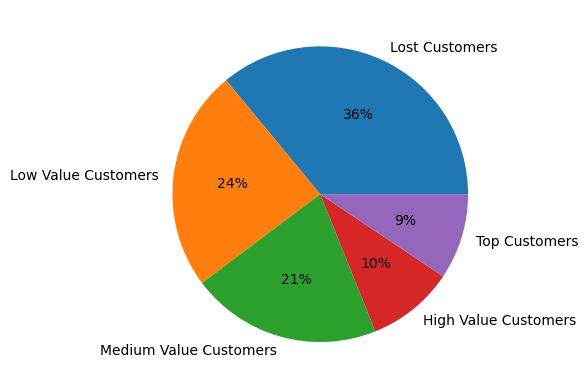

In [159]:
rfm["Customer_segment"] = np.where(rfm['RFM_score'] > 4.5, "Top Customers",
                                   (np.where(rfm['RFM_score'] > 4, "High Value Customers",
                                             (np.where(rfm['RFM_score'] > 3, "Medium Value Customers",
                                                       np.where(rfm['RFM_score'] > 1.6, "Low Value Customers", "Lost Customers"))))))

rfm["rfm_score_cluster"] = np.where(rfm['RFM_score'] > 4.5, 0,
                                   (np.where(rfm['RFM_score'] > 4, 1,
                                             (np.where(rfm['RFM_score'] > 3, 2,
                                                       np.where(rfm['RFM_score'] > 1.6, 3, 4))))))

rfm["rfm_score_marker"] = np.where(rfm['RFM_score'] > 4.5, 'o',
                                   (np.where(rfm['RFM_score'] > 4, 's',
                                             (np.where(rfm['RFM_score'] > 3, 'D',
                                                       np.where(rfm['RFM_score'] > 1.6, '^', '*'))))))

# Plotting a pie plot with each customer segmentation percentage value
plt.pie(rfm.Customer_segment.value_counts(), labels=rfm.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [163]:
rfm["balanced_rfm_score_cluster"] = np.where(rfm['balanced_RFM_score'] > 3, 0,
                                       (np.where(rfm['balanced_RFM_score'] > 2, 0,
                                            (np.where(rfm['balanced_RFM_score'] > 1, 1, 1)))))

In [164]:
rfm['cluster_2'] = clusters_2
rfm['cluster_4'] = clusters_4

rfm

,R_rank_norm,F_rank_norm,M_rank_norm,RFM_score,balanced_RFM_score,Customer_segment,rfm_score_cluster,rfm_score_marker,balanced_rfm_score_cluster,cluster_2,cluster_4
id_carta,,,,,,,,,,,
3745,100.000000,60.166184,60.166184,3.21,2.94,Medium Value Customers,2,D,0,1,1
4989,89.394851,60.166184,60.166184,3.15,2.80,Medium Value Customers,2,D,0,1,1
7594,23.457038,18.003273,18.003273,0.93,0.79,Lost Customers,4,*,1,0,0
7635,23.457038,18.003273,18.003273,0.93,0.79,Lost Customers,4,*,1,0,0
7998,5.911067,18.003273,18.003273,0.84,0.56,Lost Customers,4,*,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
491462,100.000000,45.178144,45.178144,2.53,2.54,Low Value Customers,3,^,0,1,2
491468,89.394851,18.003273,18.003273,1.26,1.67,Lost Customers,4,*,1,0,2
491470,89.394851,18.003273,18.003273,1.26,1.67,Lost Customers,4,*,1,0,2


In [166]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(rfm.iloc[:,:3], rfm.iloc[:,-3])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5273315189993216


In [136]:
print('Average RFM Score for different clusters:')
print('\nRFM Scores for k=2:')
print(rfm.loc[rfm['cluster_2']==0]['RFM_score'].mean())
print(rfm.loc[rfm['cluster_2']==1]['RFM_score'].mean())
print('\nRFM Scores for k=4:')
print(rfm.loc[rfm['cluster_4']==0]['RFM_score'].mean())
print(rfm.loc[rfm['cluster_4']==1]['RFM_score'].mean())
print(rfm.loc[rfm['cluster_4']==2]['RFM_score'].mean())
print(rfm.loc[rfm['cluster_4']==3]['RFM_score'].mean())


Average RFM Score for different clusters:

RFM Scores for k=2:
3.7084853090172234
1.3379599499374217

RFM Scores for k=4:
2.654423364952571
4.083690744920993
1.6344069264069263
0.906088387400094


In [137]:
comparison_df['cluster_2'] = clusters_2
comparison_df['cluster_4'] = clusters_4

In [138]:
print('2 Clusters:\n')
print(comparison_df.loc[comparison_df['cluster_2']==0].describe().iloc[:,:3].style.format(decimal='.', thousands=',', precision=1).to_latex(column_format='lrrr', position='!ht', position_float='centering'))
print('\n')
print(comparison_df.loc[comparison_df['cluster_2']==1].describe().iloc[:,:3].style.format(decimal='.', thousands=',', precision=1).to_latex(column_format='lrrr', position='!ht', position_float='centering'))

2 Clusters:

\begin{table}[!ht]
\centering
\begin{tabular}{lrrr}
 & frequency & monetary & recency \\
count & 3,948.0 & 3,948.0 & 3,948.0 \\
mean & 6.0 & 264.6 & 3.5 \\
std & 4.3 & 214.5 & 3.6 \\
min & 2.0 & 4.9 & 0.0 \\
25% & 3.0 & 112.5 & 1.0 \\
50% & 5.0 & 202.6 & 3.0 \\
75% & 7.0 & 357.1 & 5.0 \\
max & 43.0 & 2,551.7 & 24.0 \\
\end{tabular}
\end{table}



\begin{table}[!ht]
\centering
\begin{tabular}{lrrr}
 & frequency & monetary & recency \\
count & 3,995.0 & 3,995.0 & 3,995.0 \\
mean & 1.3 & 65.5 & 14.5 \\
std & 0.5 & 69.0 & 8.1 \\
min & 1.0 & 0.8 & 0.0 \\
25% & 1.0 & 22.8 & 8.0 \\
50% & 1.0 & 45.5 & 14.0 \\
75% & 2.0 & 84.5 & 21.0 \\
max & 3.0 & 1,773.1 & 30.0 \\
\end{tabular}
\end{table}



In [139]:
print('4 Clusters:\n')
print(comparison_df.loc[comparison_df['cluster_4']==0].describe().iloc[:,:3].style.format(decimal='.', thousands=',', precision=1).to_latex(column_format='lrrr', position='!ht', position_float='centering'))
print('\n')
print(comparison_df.loc[comparison_df['cluster_4']==1].describe().iloc[:,:3].style.format(decimal='.', thousands=',', precision=1).to_latex(column_format='lrrr', position='!ht', position_float='centering'))
print('\n')
print(comparison_df.loc[comparison_df['cluster_4']==2].describe().iloc[:,:3].style.format(decimal='.', thousands=',', precision=1).to_latex(column_format='lrrr', position='!ht', position_float='centering'))
print('\n')
print(comparison_df.loc[comparison_df['cluster_4']==3].describe().iloc[:,:3].style.format(decimal='.', thousands=',', precision=1).to_latex(column_format='lrrr', position='!ht', position_float='centering'))

4 Clusters:

\begin{table}[!ht]
\centering
\begin{tabular}{lrrr}
 & frequency & monetary & recency \\
count & 2,003.0 & 2,003.0 & 2,003.0 \\
mean & 2.7 & 141.7 & 11.3 \\
std & 0.9 & 123.9 & 5.6 \\
min & 2.0 & 3.7 & 4.0 \\
25% & 2.0 & 58.7 & 7.0 \\
50% & 2.0 & 106.2 & 10.0 \\
75% & 3.0 & 187.3 & 14.0 \\
max & 8.0 & 1,773.1 & 30.0 \\
\end{tabular}
\end{table}



\begin{table}[!ht]
\centering
\begin{tabular}{lrrr}
 & frequency & monetary & recency \\
count & 2,658.0 & 2,658.0 & 2,658.0 \\
mean & 7.5 & 313.8 & 2.1 \\
std & 4.6 & 229.8 & 2.1 \\
min & 3.0 & 16.6 & 0.0 \\
25% & 4.0 & 147.7 & 0.0 \\
50% & 6.0 & 256.0 & 2.0 \\
75% & 9.0 & 417.3 & 3.0 \\
max & 43.0 & 2,551.7 & 14.0 \\
\end{tabular}
\end{table}



\begin{table}[!ht]
\centering
\begin{tabular}{lrrr}
 & frequency & monetary & recency \\
count & 1,155.0 & 1,155.0 & 1,155.0 \\
mean & 1.4 & 70.5 & 3.0 \\
std & 0.5 & 67.3 & 2.1 \\
min & 1.0 & 2.0 & 0.0 \\
25% & 1.0 & 25.4 & 1.0 \\
50% & 1.0 & 50.5 & 3.0 \\
75% & 2.0 & 92.7 & 5.0 \\
max

In [140]:
# Merging rfm data frame with anagrafica data frame
rfm_anagrafica = pd.merge(rfm, anagrafica_data, on='id_carta', how='inner')
# Getting a csv file to do visual analysis using Power BI
rfm_anagrafica.to_csv('RFM_analysis_loc1.csv', index=False)

# K-Means Clustering

In [141]:
categories = pd.get_dummies(scontrini_ojetti_marzo_2023['id_cat_merc'],prefix='Category',prefix_sep=' ')
categories = categories.multiply(scontrini_ojetti_marzo_2023['qnt_num_pz'], axis=0)
categories['data'] = scontrini_ojetti_marzo_2023['data']
categories['cassa'] = scontrini_ojetti_marzo_2023['cassa']
categories['numero'] = scontrini_ojetti_marzo_2023['numero']
categories = categories.groupby(by=['data','cassa','numero']).sum()
categories.reset_index(inplace=True)
categories.drop(columns=['data','cassa','numero'], inplace=True)
# categories

In [142]:
k_cluster = pd.concat([scontrini_marzo_2023, categories], axis=1)

# k_cluster

In [143]:
categorical_cluster = k_cluster.drop(columns=['data','cassa','numero','id_carta'])

categorical_cluster['day'] = categorical_cluster['day'].astype('category')
categorical_cluster['day'] = categorical_cluster['day'].cat.codes
categorical_cluster['hour'] = categorical_cluster['hour'].astype('category')
categorical_cluster['hour'] = categorical_cluster['hour'].cat.codes

# categorical_cluster

In [144]:
from sklearn.preprocessing import MinMaxScaler

# Changing columns' names to type string
categorical_cluster.columns = categorical_cluster.columns.astype('str')
# Creating an instance of StandardScaler
scaler = MinMaxScaler()
# Fitting the scaler to the data and transforming the data
categorical_cluster_scaled = scaler.fit_transform(categorical_cluster)
# Converting the result back to a data frame
categorical_cluster_scaled = pd.DataFrame(categorical_cluster_scaled, columns=categorical_cluster.columns)

categorical_cluster_scaled

,in_offerta,qnt_num_pz,importo,%_offer,imp/qnt,carta,day,hour,Category 2,Category 3,...,Category 350,Category 351,Category 352,Category 353,Category 354,Category 355,Category 356,Category 357,Category 358,Category 361
0,0.016129,0.004717,0.003289,0.333333,0.010978,0.0,1.0,0.076923,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.043478,0.0
1,0.016129,0.002358,0.003206,0.500000,0.016690,1.0,1.0,0.076923,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.032258,0.011792,0.005811,0.333333,0.009372,1.0,1.0,0.076923,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.086957,0.0
3,0.000000,0.007075,0.004912,0.000000,0.012295,0.0,1.0,0.076923,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.086957,0.0
4,0.016129,0.004717,0.002670,0.333333,0.008747,0.0,1.0,0.076923,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.086957,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45741,0.016129,0.023585,0.007937,0.090909,0.006597,1.0,0.0,1.000000,0.0,0.014706,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.086957,0.0
45742,0.016129,0.000000,0.003915,1.000000,0.042396,0.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
45743,0.000000,0.002358,0.003050,0.000000,0.015843,1.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.043478,0.0
45744,0.241935,0.091981,0.104544,0.375000,0.026997,1.0,0.0,1.000000,0.0,0.000000,...,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [145]:
from sklearn.preprocessing import RobustScaler

overall_cluster = scontrini_marzo_2023.drop(columns=['data','cassa','numero','id_carta'])

# overall_cluster['day'] = overall_cluster['day'].astype('category')
# overall_cluster['day'] = overall_cluster['day'].cat.codes
# overall_cluster['hour'] = overall_cluster['hour'].astype('category')
# overall_cluster['hour'] = overall_cluster['hour'].cat.codes
overall_cluster.drop(columns=['day','hour','%_offer','imp/qnt'],inplace=True)
columns=overall_cluster.columns
# Creating an instance of StandardScaler
scaler = RobustScaler()
# Fitting the scaler to the data and transforming the data
overall_cluster = scaler.fit_transform(overall_cluster)
# Converting the result back to a data frame
overall_cluster = pd.DataFrame(overall_cluster, columns=columns)

overall_cluster

,in_offerta,qnt_num_pz,importo,carta
0,-0.25,-0.5625,-0.555613,-1.0
1,-0.25,-0.6250,-0.558200,0.0
2,0.00,-0.3750,-0.476461,0.0
3,-0.50,-0.5000,-0.504656,-1.0
4,-0.25,-0.5625,-0.575013,-1.0
...,...,...,...,...
45741,-0.25,-0.0625,-0.409726,0.0
45742,-0.25,-0.6875,-0.535954,-1.0
45743,-0.50,-0.6250,-0.563114,0.0
45744,3.25,1.7500,2.622090,0.0


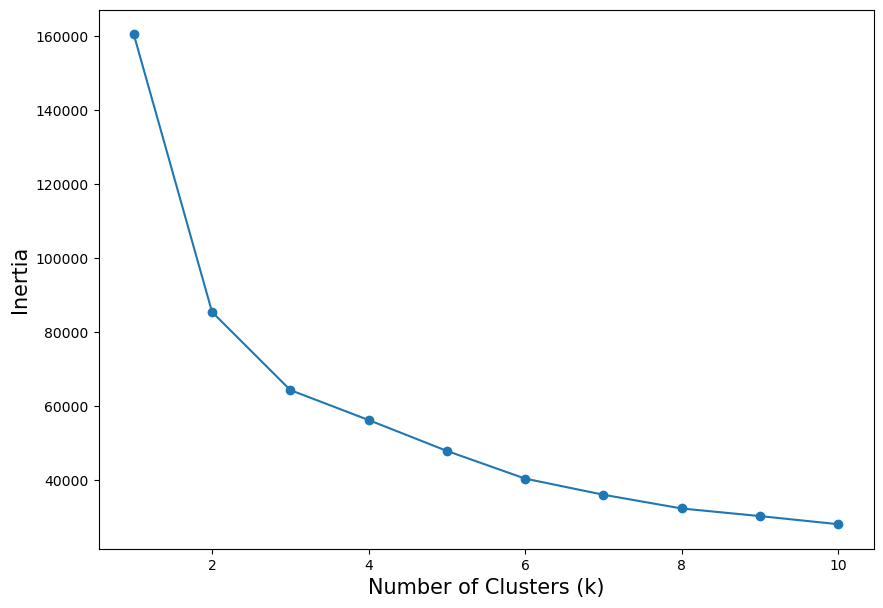

In [146]:
# Performing the Elbow Method to figure out optimal value for clusters

inertias = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans_model.fit(overall_cluster)
    inertias.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 7))
# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
# plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)',size=15)
plt.ylabel('Inertia',size=15)
plt.show()

In [147]:
from scipy.cluster.vq import kmeans, vq

centroids, distortion = kmeans(overall_cluster, 3)

clusters, _ = vq(overall_cluster, centroids)

In [148]:
from sklearn.metrics import silhouette_score

# Compute silhouette score
silhouette_avg = silhouette_score(overall_cluster, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.29716834955588317


In [149]:
clustered = pd.concat([categorical_cluster,pd.DataFrame(clusters)], axis=1)

clustered.rename(columns={0:'cluster'}, inplace=True)

cluster_1 = clustered.loc[clustered['cluster']==0]
cluster_2 = clustered.loc[clustered['cluster']==1]
cluster_3 = clustered.loc[clustered['cluster']==2]
# cluster_4 = clustered.loc[clustered['cluster']==3]

print('Cluster 1 Average Money Spent: ', cluster_1['importo'].mean())
print('Cluster 2 Average Money Spent: ', cluster_2['importo'].mean())
print('Cluster 3 Average Money Spent: ', cluster_3['importo'].mean())
# print('Cluster 4 Average Money Spent: ', cluster_4['importo'].mean())

Cluster 1 Average Money Spent:  95.32527540729248
Cluster 2 Average Money Spent:  17.56710890885399
Cluster 3 Average Money Spent:  28.353805618282


In [150]:
latex_table = cluster_1.describe().iloc[:,:6].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrr}
 & in_offerta & qnt_num_pz & importo & %_offer & imp/qnt & carta \\
count & 9,023.00 & 9,023.00 & 9,023.00 & 9,023.00 & 9,023.00 & 9,023.00 \\
mean & 9.34 & 40.78 & 95.33 & 25.55 & 2.42 & 0.81 \\
std & 6.33 & 17.99 & 49.60 & 17.24 & 1.15 & 0.39 \\
min & 0.00 & 4.00 & 11.46 & 0.00 & 0.19 & 0.00 \\
25% & 5.00 & 29.00 & 62.06 & 12.50 & 1.87 & 1.00 \\
50% & 8.00 & 37.00 & 84.86 & 21.95 & 2.28 & 1.00 \\
75% & 12.00 & 49.00 & 117.05 & 34.78 & 2.77 & 1.00 \\
max & 62.00 & 425.00 & 1,213.42 & 100.00 & 43.80 & 1.00 \\
\end{tabular}
\end{table}



In [151]:
latex_table = cluster_2.describe().iloc[:,:6].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrr}
 & in_offerta & qnt_num_pz & importo & %_offer & imp/qnt & carta \\
count & 14,581.00 & 14,581.00 & 14,581.00 & 14,581.00 & 14,581.00 & 14,581.00 \\
mean & 1.39 & 7.78 & 17.57 & 18.25 & 2.64 & 0.00 \\
std & 1.62 & 6.45 & 15.52 & 21.96 & 2.62 & 0.00 \\
min & 0.00 & 1.00 & 0.15 & 0.00 & 0.15 & 0.00 \\
25% & 0.00 & 3.00 & 5.76 & 0.00 & 1.53 & 0.00 \\
50% & 1.00 & 6.00 & 12.74 & 12.50 & 2.14 & 0.00 \\
75% & 2.00 & 11.00 & 24.93 & 27.27 & 2.97 & 0.00 \\
max & 11.00 & 50.00 & 109.30 & 100.00 & 99.20 & 0.00 \\
\end{tabular}
\end{table}



In [152]:
latex_table = cluster_3.describe().iloc[:,:6].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrr}
 & in_offerta & qnt_num_pz & importo & %_offer & imp/qnt & carta \\
count & 22,142.00 & 22,142.00 & 22,142.00 & 22,142.00 & 22,142.00 & 22,142.00 \\
mean & 2.46 & 12.39 & 28.35 & 21.93 & 2.66 & 0.98 \\
std & 2.24 & 7.77 & 18.87 & 20.58 & 2.16 & 0.14 \\
min & 0.00 & 1.00 & 0.35 & 0.00 & 0.16 & 0.00 \\
25% & 1.00 & 6.00 & 13.65 & 6.47 & 1.69 & 1.00 \\
50% & 2.00 & 11.00 & 24.26 & 17.39 & 2.24 & 1.00 \\
75% & 4.00 & 17.00 & 39.25 & 33.33 & 2.97 & 1.00 \\
max & 13.00 & 62.00 & 143.88 & 100.00 & 112.19 & 1.00 \\
\end{tabular}
\end{table}



In [153]:
# cluster_4.describe().iloc[:,:8]

In [154]:
corr_mat = cluster_1.corr(method='spearman')

corr_mat[((corr_mat>0.5) | (corr_mat<-0.5)) & (corr_mat<1.0)].dropna(axis=0, how='all').dropna(axis=1, how='all')

,in_offerta,qnt_num_pz,importo,%_offer,imp/qnt
in_offerta,NaN,NaN,NaN,0.839568,NaN
qnt_num_pz,NaN,NaN,0.659091,NaN,NaN
importo,NaN,0.659091,NaN,NaN,0.593287
%_offer,0.839568,NaN,NaN,NaN,NaN
imp/qnt,NaN,NaN,0.593287,NaN,NaN


In [155]:
corr_mat = cluster_2.corr(method='spearman')

corr_mat[((corr_mat>0.5) | (corr_mat<-0.5)) & (corr_mat<1.0)].dropna(axis=0, how='all').dropna(axis=1, how='all')

,in_offerta,qnt_num_pz,importo,%_offer,Category 142,Category 230,Category 265
in_offerta,NaN,0.607060,0.500153,0.867785,NaN,NaN,0.555958
qnt_num_pz,0.607060,NaN,0.805106,NaN,NaN,NaN,0.502540
importo,0.500153,0.805106,NaN,NaN,NaN,NaN,NaN
%_offer,0.867785,NaN,NaN,NaN,NaN,NaN,NaN
Category 142,NaN,NaN,NaN,NaN,NaN,0.707083,NaN
Category 230,NaN,NaN,NaN,NaN,0.707083,NaN,NaN
Category 265,0.555958,0.502540,NaN,NaN,NaN,NaN,NaN


In [156]:
corr_mat = cluster_3.corr(method='spearman')

corr_mat[((corr_mat>0.5) | (corr_mat<-0.5)) & (corr_mat<1.0)].dropna(axis=0, how='all').dropna(axis=1, how='all')

,in_offerta,qnt_num_pz,importo,%_offer
in_offerta,NaN,NaN,NaN,0.812625
qnt_num_pz,NaN,NaN,0.759332,NaN
importo,NaN,0.759332,NaN,NaN
%_offer,0.812625,NaN,NaN,NaN


In [157]:
# corr_mat = cluster_4.corr(method='spearman')

# corr_mat[((corr_mat>0.5) | (corr_mat<-0.5)) & (corr_mat<1.0)].dropna(axis=0, how='all').dropna(axis=1, how='all')

In [158]:
categorie_merceologiche.loc[categorie_merceologiche['id_catmerc'].isin([142,230,265])]

,id_catmerc,id_settore,codice,nome
138,142,3,MECA,MERCERIA - CALZE BOTTONI ECC.
226,230,9,PRCA,TONICO
261,265,3,PXBP,BUSTE DI PLASTICA


In [159]:
# Creating a PCA instance
pca = PCA(n_components=2)

# Fitting the PCA model and transforming the data
overall_pca = pca.fit_transform(overall_cluster)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio for each PC:", explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Explained Variance Ratio for each PC: [0.73801979 0.16334624]
Cumulative Explained Variance: [0.73801979 0.90136603]


In [160]:
# Creating a new DataFrame with the principal components
overall_pca = pd.DataFrame(data=overall_pca, columns=[f'PC{i+1}' for i in range(overall_pca.shape[1])])
# Adding cluster values to it
overall_pca = pd.concat([overall_pca, pd.DataFrame(clusters)], axis=1)
overall_pca.rename(columns={0:'Cluster'}, inplace=True)

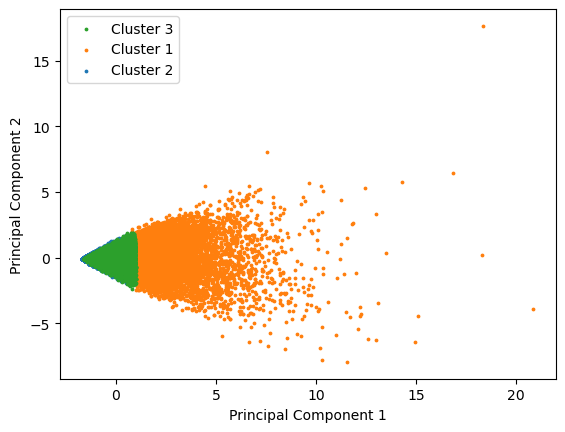

In [161]:
# Create a scatter plot for each unique value in the 'Cluster' column
for value in [1,0,2]:
    subset = overall_pca[overall_pca['Cluster'] == value]
    plt.scatter(subset['PC1'], subset['PC2'], s=3, label=f'Cluster {value+1}')
# plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(reverse=True)

plt.show()

In [162]:
comb_sectors = sectors.drop(columns=['Card', 'Sector 6', 'Sector 10', 'Sector 11', 'Sector 12',
                                     'Sector 15', 'Sector 17', 'Sector 20', 'Sector 21'])
comb_sectors['Sectors 6 & 17'] = sectors['Sector 6']+sectors['Sector 17']
comb_sectors['Sectors 10 & 11 & 12'] = sectors['Sector 10']+sectors['Sector 11']+sectors['Sector 12']
comb_sectors['Sectors 15 & 20 & 21'] = sectors['Sector 15']+sectors['Sector 20']+sectors['Sector 21']

In [163]:
# Creating a PCA instance
pca = PCA(n_components=5)

# Fitting the PCA model and transforming the data
sectors_pca = pca.fit_transform(comb_sectors)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio for each PC:", explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_explained_variance)

Explained Variance Ratio for each PC: [0.56301268 0.19943866 0.07057585 0.0513881  0.03134024]
Cumulative Explained Variance: [0.56301268 0.76245134 0.83302719 0.88441529 0.91575553]


In [164]:
sector_clustering = pd.concat([overall_pca.drop(columns=['Cluster']),pd.DataFrame(sectors_pca)], axis=1)
sector_clustering.columns = ['T_PC1','T_PC2','S_PC1','S_PC2','S_PC3','S_PC4','S_PC5']

In [165]:
# Creating an instance of StandardScaler
scaler = RobustScaler()
# Fitting the scaler to the data and transforming the data
sector_clustering = scaler.fit_transform(sector_clustering)
# Converting the result back to a data frame
sector_clustering = pd.DataFrame(sector_clustering, columns=['T_PC1','T_PC2','S_PC1','S_PC2','S_PC3','S_PC4','S_PC5'])

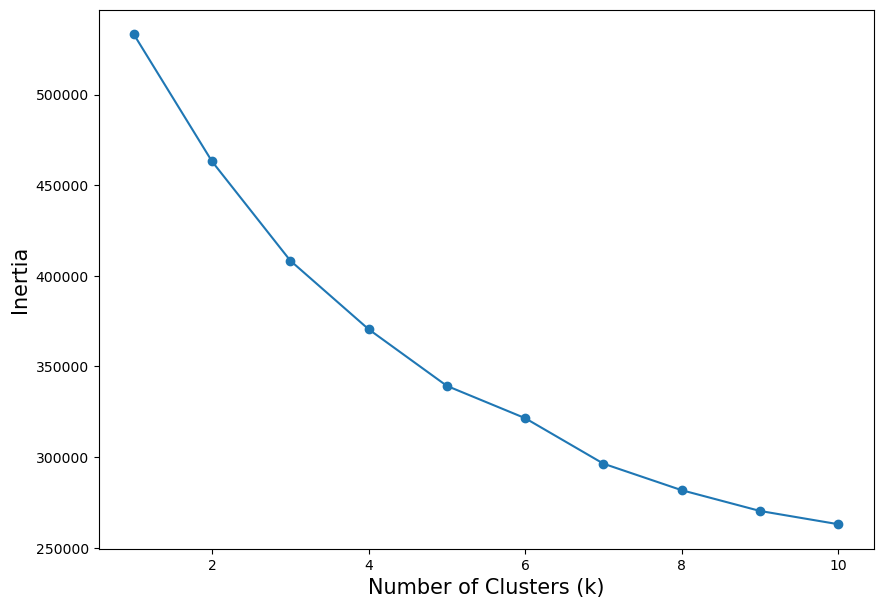

In [166]:
# Performing the Elbow Method to figure out optimal value for clusters

inertias = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans_model.fit(sector_clustering)
    inertias.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 7))
# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
# plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)',size=15)
plt.ylabel('Inertia',size=15)
plt.show()

In [167]:
# for k in range(2,8):
#     variable_name = f"clusters_{k}"
#     centroids, distortion = kmeans(sector_clustering, k)
#     locals()[variable_name], _ = vq(sector_clustering, centroids)
#     # Computing the silhouette score
#     silhouette_avg = silhouette_score(sector_clustering, locals()[variable_name])
#     print(f"Silhouette Score for {k} Clusters: {silhouette_avg}")

In [168]:
# sector_clusters_2 = pd.concat([pd.DataFrame(clusters_2),
#                                scontrini_marzo_2023.drop(columns=['data','numero','cassa','id_carta','day','hour']),
#                                comb_sectors], axis=1)
# sector_clusters_2.rename(columns={0:'Cluster Indicator'}, inplace=True)

sector_clusters_3 = pd.concat([pd.DataFrame(clusters_3),
                               scontrini_marzo_2023.drop(columns=['data','numero','cassa','id_carta','day','hour'])], axis=1)
sector_clusters_3.rename(columns={0:'Cluster Indicator'}, inplace=True)

# sector_clusters_4 = pd.concat([pd.DataFrame(clusters_4),
#                                scontrini_marzo_2023.drop(columns=['data','numero','cassa','id_carta','day','hour']),
#                                comb_sectors], axis=1)
# sector_clusters_4.rename(columns={0:'Cluster Indicator'}, inplace=True)

In [169]:
df = sector_clusters_3.loc[sector_clusters_3['Cluster Indicator']==0].describe()

latex_table = df.iloc[:,1:].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrr}
 & in_offerta & qnt_num_pz & importo & %_offer & imp/qnt & carta \\
count & 2,728.00 & 2,728.00 & 2,728.00 & 2,728.00 & 2,728.00 & 2,728.00 \\
mean & 3.23 & 16.99 & 39.60 & 19.87 & 2.58 & 0.64 \\
std & 4.07 & 16.22 & 39.99 & 18.89 & 2.67 & 0.48 \\
min & 0.00 & 1.00 & 0.62 & 0.00 & 0.15 & 0.00 \\
25% & 1.00 & 6.00 & 12.89 & 5.56 & 1.72 & 0.00 \\
50% & 2.00 & 12.00 & 26.36 & 15.79 & 2.24 & 1.00 \\
75% & 4.00 & 23.00 & 52.20 & 28.57 & 2.87 & 1.00 \\
max & 39.00 & 154.00 & 348.37 & 100.00 & 112.19 & 1.00 \\
\end{tabular}
\end{table}



In [170]:
df = sector_clusters_3.loc[sector_clusters_3['Cluster Indicator']==1].describe()

latex_table = df.iloc[:,1:].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrr}
 & in_offerta & qnt_num_pz & importo & %_offer & imp/qnt & carta \\
count & 2,506.00 & 2,506.00 & 2,506.00 & 2,506.00 & 2,506.00 & 2,506.00 \\
mean & 3.18 & 16.66 & 38.63 & 19.79 & 2.58 & 0.63 \\
std & 3.80 & 16.28 & 40.38 & 18.87 & 2.20 & 0.48 \\
min & 0.00 & 1.00 & 0.28 & 0.00 & 0.20 & 0.00 \\
25% & 1.00 & 6.00 & 11.89 & 5.88 & 1.71 & 0.00 \\
50% & 2.00 & 12.00 & 24.82 & 16.67 & 2.21 & 1.00 \\
75% & 4.00 & 22.00 & 50.84 & 28.57 & 2.86 & 1.00 \\
max & 37.00 & 170.00 & 431.00 & 100.00 & 50.24 & 1.00 \\
\end{tabular}
\end{table}



In [171]:
df = sector_clusters_3.loc[sector_clusters_3['Cluster Indicator']==2].describe()

latex_table = df.iloc[:,1:].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrr}
 & in_offerta & qnt_num_pz & importo & %_offer & imp/qnt & carta \\
count & 2,709.00 & 2,709.00 & 2,709.00 & 2,709.00 & 2,709.00 & 2,709.00 \\
mean & 3.29 & 16.98 & 39.85 & 19.55 & 2.68 & 0.64 \\
std & 4.19 & 15.95 & 40.34 & 18.36 & 2.86 & 0.48 \\
min & 0.00 & 1.00 & 0.30 & 0.00 & 0.15 & 0.00 \\
25% & 1.00 & 6.00 & 12.72 & 5.56 & 1.71 & 0.00 \\
50% & 2.00 & 12.00 & 26.64 & 16.67 & 2.25 & 1.00 \\
75% & 4.00 & 23.00 & 52.51 & 28.57 & 2.92 & 1.00 \\
max & 44.00 & 113.00 & 295.22 & 100.00 & 99.20 & 1.00 \\
\end{tabular}
\end{table}



In [172]:
# sector_into_2 = pd.concat([comb_sectors,pd.DataFrame(clusters_2)],axis=1)
# sector_into_2.rename(columns={0:'Cluster'},inplace=True)
sector_into_3 = pd.concat([comb_sectors,pd.DataFrame(clusters_3)],axis=1)
sector_into_3.rename(columns={0:'Cluster'},inplace=True)
# # sector_into_2
# sector_c1 = sector_into_2.loc[sector_into_2['Cluster']==0]
# sector_c2 = sector_into_2.loc[sector_into_2['Cluster']==1]
# sector_into_3
sector_c1 = sector_into_3.loc[sector_into_3['Cluster']==0]
sector_c2 = sector_into_3.loc[sector_into_3['Cluster']==1]
sector_c3 = sector_into_3.loc[sector_into_3['Cluster']==2]

In [173]:
df = sector_c1.describe().drop(columns=['Cluster']).T
df = df.sort_values(by='mean',ascending=False).head(8)

latex_table = df.iloc[:,1:].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrr}
 & mean & std & min & 25% & 50% & 75% & max \\
Sector 1 & 5.22 & 6.55 & 0.00 & 1.00 & 3.00 & 7.00 & 95.00 \\
Sector 2 & 2.63 & 3.87 & 0.00 & 0.00 & 1.00 & 4.00 & 37.00 \\
Sector 4 & 2.52 & 3.84 & 0.00 & 0.00 & 1.00 & 3.00 & 36.00 \\
Sector 5 & 2.01 & 2.89 & 0.00 & 0.00 & 1.00 & 3.00 & 25.00 \\
Sector 3 & 1.42 & 1.98 & 0.00 & 0.00 & 1.00 & 2.00 & 40.00 \\
Sector 13 & 1.12 & 1.91 & 0.00 & 0.00 & 0.00 & 2.00 & 19.00 \\
Sector 8 & 0.55 & 1.54 & 0.00 & 0.00 & 0.00 & 0.00 & 30.00 \\
Sector 9 & 0.45 & 1.17 & 0.00 & 0.00 & 0.00 & 0.00 & 13.00 \\
\end{tabular}
\end{table}



In [174]:
df = sector_c2.describe().drop(columns=['Cluster']).T
df = df.sort_values(by='mean',ascending=False).head(8)

latex_table = df.iloc[:,1:].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrr}
 & mean & std & min & 25% & 50% & 75% & max \\
Sector 1 & 4.95 & 6.29 & 0.00 & 1.00 & 3.00 & 6.00 & 77.00 \\
Sector 2 & 2.67 & 3.98 & 0.00 & 0.00 & 1.00 & 4.00 & 49.00 \\
Sector 4 & 2.43 & 3.61 & 0.00 & 0.00 & 1.00 & 3.00 & 37.00 \\
Sector 5 & 2.07 & 3.11 & 0.00 & 0.00 & 1.00 & 3.00 & 57.00 \\
Sector 3 & 1.41 & 1.82 & 0.00 & 0.00 & 1.00 & 2.00 & 16.00 \\
Sector 13 & 1.11 & 1.89 & 0.00 & 0.00 & 0.00 & 2.00 & 16.00 \\
Sector 8 & 0.51 & 1.28 & 0.00 & 0.00 & 0.00 & 0.00 & 14.00 \\
Sector 9 & 0.43 & 1.10 & 0.00 & 0.00 & 0.00 & 0.00 & 11.00 \\
\end{tabular}
\end{table}



In [175]:
df = sector_c3.describe().drop(columns=['Cluster']).T
df = df.sort_values(by='mean',ascending=False).head(8)

latex_table = df.iloc[:,1:].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

\begin{table}[!ht]
\centering
\begin{tabular}{lrrrrrr}
 & mean & std & min & 25% & 50% & 75% & max \\
Sector 1 & 5.24 & 6.49 & 0.00 & 1.00 & 3.00 & 7.00 & 72.00 \\
Sector 2 & 2.66 & 4.04 & 0.00 & 0.00 & 1.00 & 4.00 & 47.00 \\
Sector 4 & 2.53 & 3.55 & 0.00 & 0.00 & 1.00 & 3.00 & 25.00 \\
Sector 5 & 2.02 & 2.84 & 0.00 & 0.00 & 1.00 & 3.00 & 28.00 \\
Sector 3 & 1.38 & 1.82 & 0.00 & 0.00 & 1.00 & 2.00 & 16.00 \\
Sector 13 & 1.13 & 1.91 & 0.00 & 0.00 & 0.00 & 2.00 & 18.00 \\
Sector 8 & 0.54 & 1.34 & 0.00 & 0.00 & 0.00 & 0.00 & 17.00 \\
Sector 9 & 0.43 & 1.14 & 0.00 & 0.00 & 0.00 & 0.00 & 13.00 \\
\end{tabular}
\end{table}



In [176]:
overall_cluster

,in_offerta,qnt_num_pz,importo,carta
0,-0.25,-0.5625,-0.555613,-1.0
1,-0.25,-0.6250,-0.558200,0.0
2,0.00,-0.3750,-0.476461,0.0
3,-0.50,-0.5000,-0.504656,-1.0
4,-0.25,-0.5625,-0.575013,-1.0
...,...,...,...,...
45741,-0.25,-0.0625,-0.409726,0.0
45742,-0.25,-0.6875,-0.535954,-1.0
45743,-0.50,-0.6250,-0.563114,0.0
45744,3.25,1.7500,2.622090,0.0


In [177]:
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix
scaler = StandardScaler()
overall_scaled = scaler.fit_transform(overall_cluster)

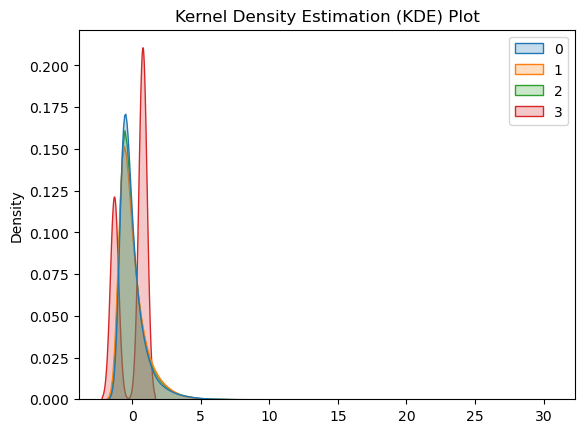

In [178]:
# Generate random data for illustration
data = np.random.randn(1000)

# Create a KDE plot
sns.kdeplot(overall_scaled, bw_method=0.3, fill=True)
plt.title('Kernel Density Estimation (KDE) Plot')
plt.show()

In [179]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=1000)
labels = dbscan.fit_predict(overall_scaled)
overall_pca['DBSCAN'] = pd.DataFrame(labels)

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster

# Performing hierarchical clustering
linkage_matrix = linkage(overall_scaled, method='ward')
# Creating labels
labels = fcluster(linkage_matrix, 3, criterion='maxclust')
overall_pca['Hierarchy'] = pd.DataFrame(labels)

In [ ]:
# Create a scatter plot for each unique value in the 'Cluster' column
# labels = ['Noise','Cluster 1','Cluster 2']
for value in overall_pca['Hierarchy'].unique():
    subset = overall_pca[overall_pca['Hierarchy'] == value]
    plt.scatter(subset['PC1'], subset['PC2'], s=3, label=f" Cluster {value}")
# plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(-2,4)
plt.ylim(-3,3)
plt.legend(reverse=True)

plt.show()

In [ ]:
clustered = pd.concat([categorical_cluster,pd.DataFrame(overall_pca['Hierarchy'])], axis=1)

cluster_1 = clustered.loc[clustered['Hierarchy']==0]
cluster_2 = clustered.loc[clustered['Hierarchy']==1]
cluster_3 = clustered.loc[clustered['Hierarchy']==-1]
# cluster_4 = clustered.loc[clustered['cluster']==3]

print('Cluster 1 Average Money Spent: ', cluster_1['importo'].mean())
print('Cluster 2 Average Money Spent: ', cluster_2['importo'].mean())
print('Cluster 3 Average Money Spent: ', cluster_3['importo'].mean())
# print('Cluster 4 Average Money Spent: ', cluster_4['importo'].mean())

In [ ]:
latex_table = cluster_1.describe().iloc[:,:6].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

In [ ]:
latex_table = cluster_2.describe().iloc[:,:6].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

In [ ]:
latex_table = cluster_3.describe().iloc[:,:6].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

In [ ]:
offer_clustering = scontrini_marzo_2023[['importo','%_offer']]

scaler = RobustScaler()
data = scaler.fit_transform(offer_clustering)
# Applying DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=1000)
labels = dbscan.fit_predict(data)
offer_clustering = pd.concat([offer_clustering, pd.DataFrame(labels)], axis=1)
offer_clustering.rename(columns={0:'DBSCAN'}, inplace=True)

In [ ]:
offer_clustering['DBSCAN'].unique()

In [ ]:
# Create a scatter plot for each unique value in the 'DBSCAN' column
for value in offer_clustering['DBSCAN'].unique():
    subset = offer_clustering[offer_clustering['DBSCAN'] == value]
    plt.scatter(subset['importo'], subset['%_offer'], s=3, label=f"Cluster {value+2}")
# plt.title('PCA Results')
plt.xlabel('Total Amount Spent')
plt.ylabel('Percentage Items bought on Offer')
# plt.xlim(-2,4)
# plt.ylim(-3,3)
plt.legend()

plt.show()

In [ ]:
# Performing the Elbow Method to figure out optimal value for clusters

inertias = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init='auto')
    kmeans_model.fit(data)
    inertias.append(kmeans_model.inertia_)

plt.figure(figsize=(10, 7))
# Plot the elbow curve
plt.plot(range(1, 11), inertias, marker='o')
# plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)',size=15)
plt.ylabel('Inertia',size=15)
plt.show()

In [ ]:
for k in range(2,11):
    variable_name = f"clusters_{k}"
    centroids, distortion = kmeans(data, k)
    locals()[variable_name], _ = vq(data, centroids)
    # Computing the silhouette score
    silhouette_avg = silhouette_score(data, locals()[variable_name])
    print(f"Silhouette Score for {k} Clusters: {silhouette_avg}")

In [ ]:
offer_clustering['2 Clusters'] = pd.DataFrame(clusters_2)
offer_clustering['3 Clusters'] = pd.DataFrame(clusters_3)
offer_clustering['5 Clusters'] = pd.DataFrame(clusters_5)

In [ ]:
# Create a scatter plot for each unique value in the 'DBSCAN' column
for value in [0,1,2,3,4]:
    subset = offer_clustering[offer_clustering['5 Clusters'] == value]
    plt.scatter(subset['importo'], subset['%_offer'], s=3, label=f"Cluster {value+1}")
# plt.title('PCA Results')
plt.xlabel('Total Amount Spent (in Euros)')
plt.ylabel('Percentage Items bought on Offer')
# plt.xlim(-2,4)
# plt.ylim(-3,3)
plt.legend()

plt.show()

In [ ]:
offer_clustering['3 Clusters'].value_counts()

In [ ]:
clustered = pd.concat([categorical_cluster,pd.DataFrame(offer_clustering['3 Clusters'])], axis=1)

cluster_1 = clustered.loc[clustered['3 Clusters']==0]
cluster_2 = clustered.loc[clustered['3 Clusters']==1]
cluster_3 = clustered.loc[clustered['3 Clusters']==2]
# cluster_4 = clustered.loc[clustered['cluster']==3]

print('Cluster 1 Average Money Spent: ', cluster_1['importo'].mean())
print('Cluster 2 Average Money Spent: ', cluster_2['importo'].mean())
print('Cluster 3 Average Money Spent: ', cluster_3['importo'].mean())
# print('Cluster 4 Average Money Spent: ', cluster_4['importo'].mean())

In [ ]:
latex_table = cluster_1.describe().iloc[:,:6].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

In [ ]:
latex_table = cluster_2.describe().iloc[:,:6].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

In [ ]:
latex_table = cluster_3.describe().iloc[:,:6].style.format(decimal='.', thousands=',', precision=2).to_latex(column_format='lrrrrrr', position='!ht', position_float='centering')
print(latex_table)

In [ ]:
scontrini_marzo_2023['%_offer'].mean()